Temperature Forecast Project using ML
Project Description
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

Attribute Information:
For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.

Dataset Link-

https://github.com/dsrscientist/Dataset2/blob/main/temperature.csv


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')
df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

In [3]:
df.shape

(7752, 25)

In [4]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [5]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


no.of null values is very less when compare to remaining rows so will drop nan containing rows and columns

In [7]:
print("We had {} Rows and {} Columns before dropping null values.".format(df.shape[0], df.shape[1]))
df.dropna(inplace=True)
print("We have {} Rows and {} Columns after dropping null values.".format(df.shape[0], df.shape[1]))

We had 7752 Rows and 25 Columns before dropping null values.
We have 7588 Rows and 25 Columns after dropping null values.


In [8]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

so there is no null values

<Axes: >

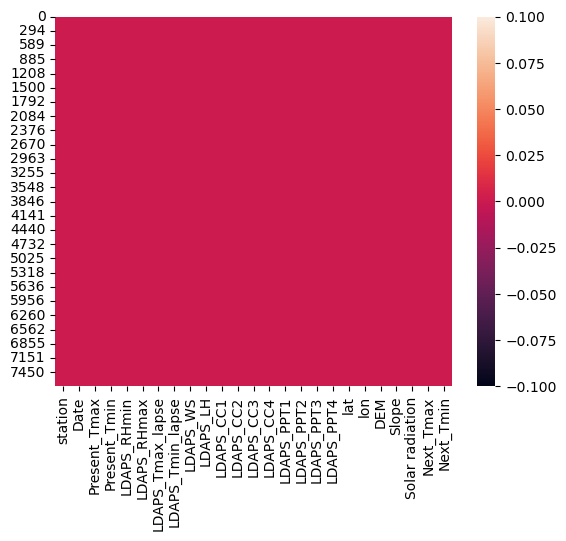

In [9]:
sns.heatmap(df.isnull())

conversion of date format

In [10]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)
df['Year']=df['Date'].apply(lambda x:x.year)

In [11]:
df.head(2)

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS   LDAPS_LH  ...      lat  \
0         28.074101         23.006936  6.818887  69.451805  ...  37.6046   
1         29.850689         24.035009  5.691890  51.937448  ...  37.6046   

       lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  Month  \
0  126.991  212.3350  2.7850      5992.895996       29.1       21.2      6   
1  127.032   44.7624  0.5141      5869.312500       30.5       22.5      6   

   Day  Year  
0   30  2013  
1   30  2013  

[2 rows x 28 columns]

<Axes: xlabel='Present_Tmax', ylabel='Count'>

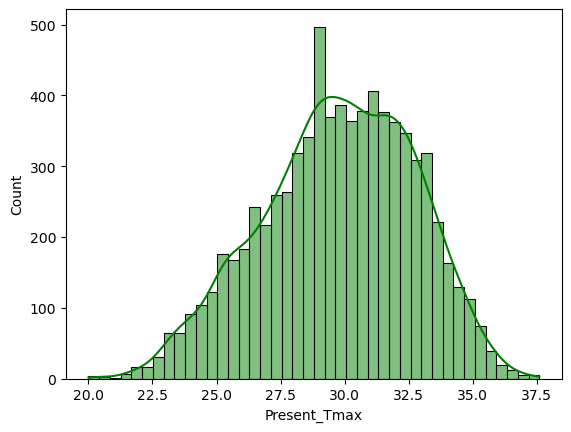

In [12]:
sns.histplot(df['Present_Tmax'],kde=True,color='g')

maximum degree shows at 29 degrees

<Axes: xlabel='Present_Tmin', ylabel='Count'>

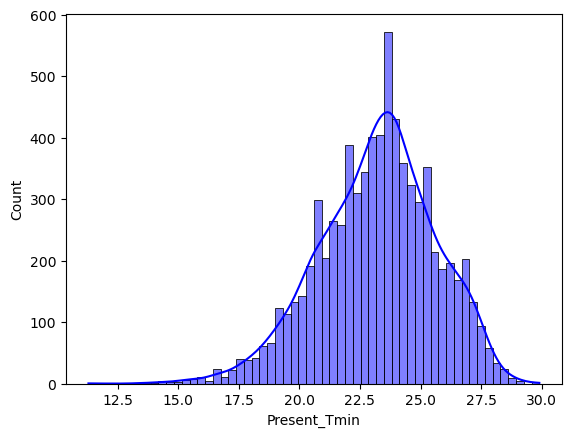

In [13]:
sns.histplot(df['Present_Tmin'],kde=True,color='b')

maximum degrees shows at 24 degrees

In [14]:
df.Present_Tmax.max()

37.6

In [15]:
df.Present_Tmax.min()

20.0

In [16]:
df.Present_Tmax.mean()

29.748365840801263

Present_Tmax Maxima,minimum and average values in year 2013-2016 are 37.6,20,29.7

In [17]:
df.Present_Tmin.max()

29.9

In [18]:
df.Present_Tmin.min()

11.3

In [19]:
df.Present_Tmin.mean()

23.195809172377437

Present_Tmin Maxima,minimum and average values in year 2013-2016 are 29.9,11.3,23

Checking where actually these minima and maxima occur

In [20]:
df.loc[df.Present_Tmax==df.Present_Tmax.max()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
5717     18.0 2016-11-08          37.6          26.8    44.254253   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
5717    87.745514         34.794021         27.150764  6.366598  111.225118   

      ...      lat      lon      DEM   Slope  Solar radiation  Next_Tmax  \
5717  ...  37.4832  127.024  56.4448  1.2313      5082.563477       37.0   

      Next_Tmin  Month  Day  Year  
5717       27.8     11    8  2016  

[1 rows x 28 columns]

In [21]:
df.loc[df.Present_Tmax==df.Present_Tmax.min()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7725      1.0 2017-08-30          20.0          15.1    35.652172   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
7725     89.97319         24.323737         16.128899  7.087329  108.981108   

      ...      lat      lon      DEM  Slope  Solar radiation  Next_Tmax  \
7725  ...  37.6046  126.991  212.335  2.785       4614.76123       23.8   

      Next_Tmin  Month  Day  Year  
7725       15.1      8   30  2017  

[1 rows x 28 columns]

In [22]:
df.loc[df.Present_Tmin==df.Present_Tmin.max()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
2397     23.0 2014-02-08          35.3          29.9    53.946949   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
2397    85.985161         30.912804         25.439537  13.011129  117.837212   

      ...      lat      lon      DEM   Slope  Solar radiation  Next_Tmax  \
2397  ...  37.5372  126.891  15.5876  0.1554      5360.226563       31.3   

      Next_Tmin  Month  Day  Year  
2397       24.8      2    8  2014  

[1 rows x 28 columns]

In [23]:
df.loc[df.Present_Tmin==df.Present_Tmin.min()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
6116     17.0 2016-08-27          27.1          11.3    62.793823   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  \
6116    91.726936         23.529546         17.963487  7.984566  84.48145   

      ...      lat      lon      DEM  Slope  Solar radiation  Next_Tmax  \
6116  ...  37.6181  127.099  53.4712  0.697      4539.616699       24.6   

      Next_Tmin  Month  Day  Year  
6116       17.1      8   27  2016  

[1 rows x 28 columns]

Present Maximum Temperature Maxima over four year span recorded at station 18 on 2016-11-08 with Temp of 37.6 degree. Station 18 Located at Bucheon-si city of Gyeonggido state.
Present Maximum Temperature Minima over four year span recorded at station 1 on 2017-08-30 with Temp of 20 degree.
Present Maximum Temperature Maxima over four year span recorded at station 23 on 2014-02-08 with Temp of 29.9 degree. The station 23 is located in Gurisi of Gyeonggido state
Present Maximum Temperature Minima over four year span recorded at station 17 on 2016-08-27 with Temp of 11.3 degree. The station 17 is located in seoul city.

<Axes: xlabel='station', ylabel='Present_Tmax'>

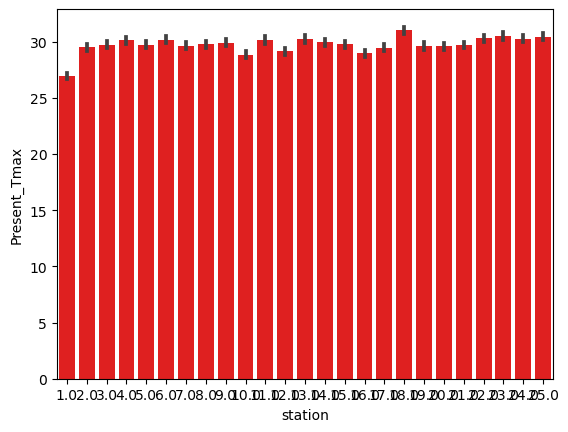

In [24]:
sns.barplot(x="station", y="Present_Tmax", data=df, color="red")

<Axes: xlabel='station', ylabel='Present_Tmin'>

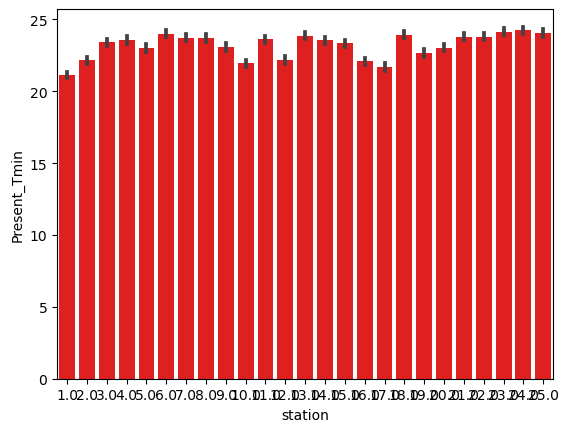

In [25]:
sns.barplot(x="station", y="Present_Tmin", data=df, color="red")

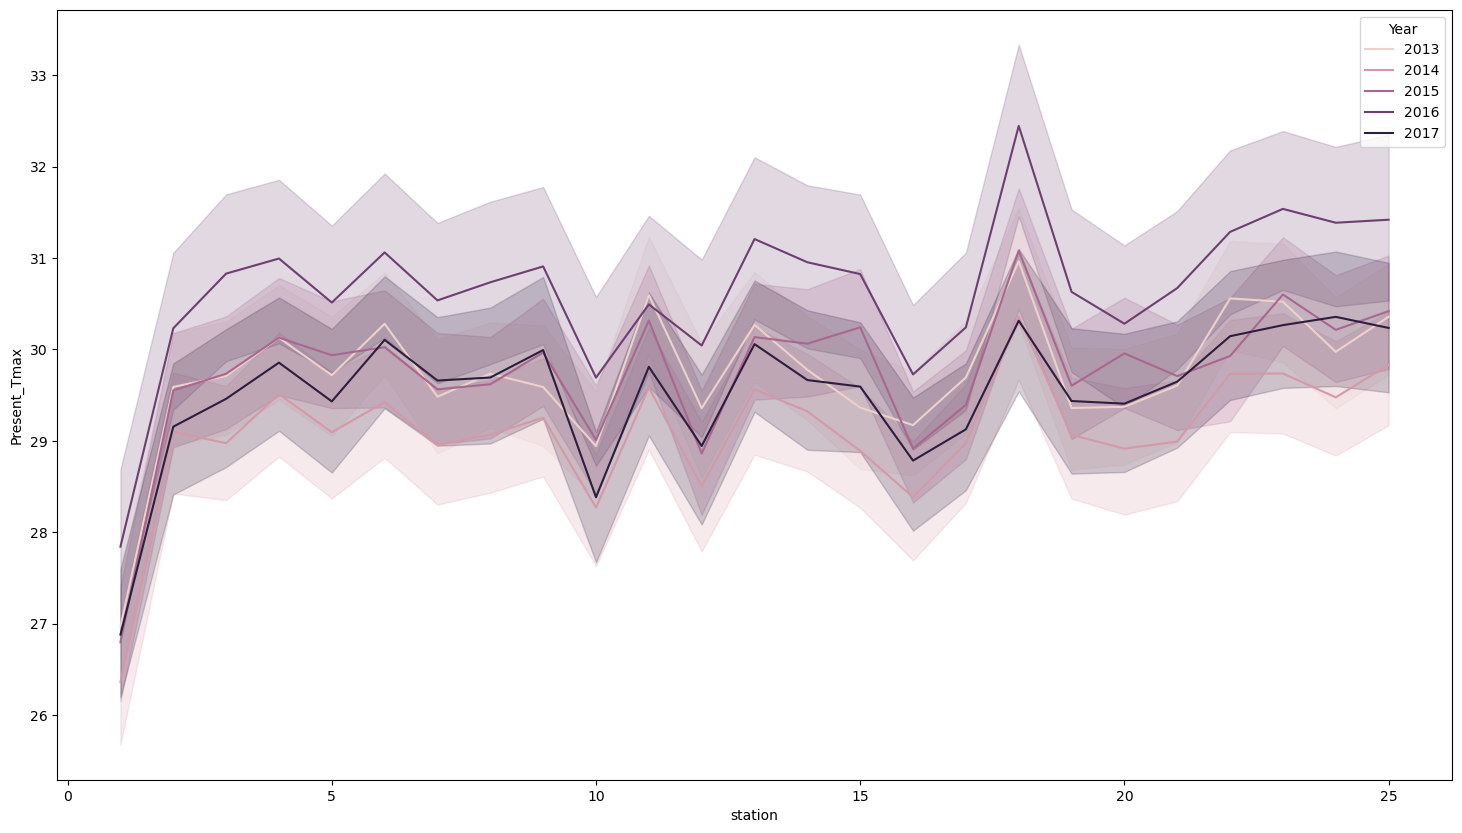

In [26]:
plt.figure(figsize=(18,10))
sns.lineplot(x="station", y="Present_Tmax", hue='Year', data=df)
plt.show()

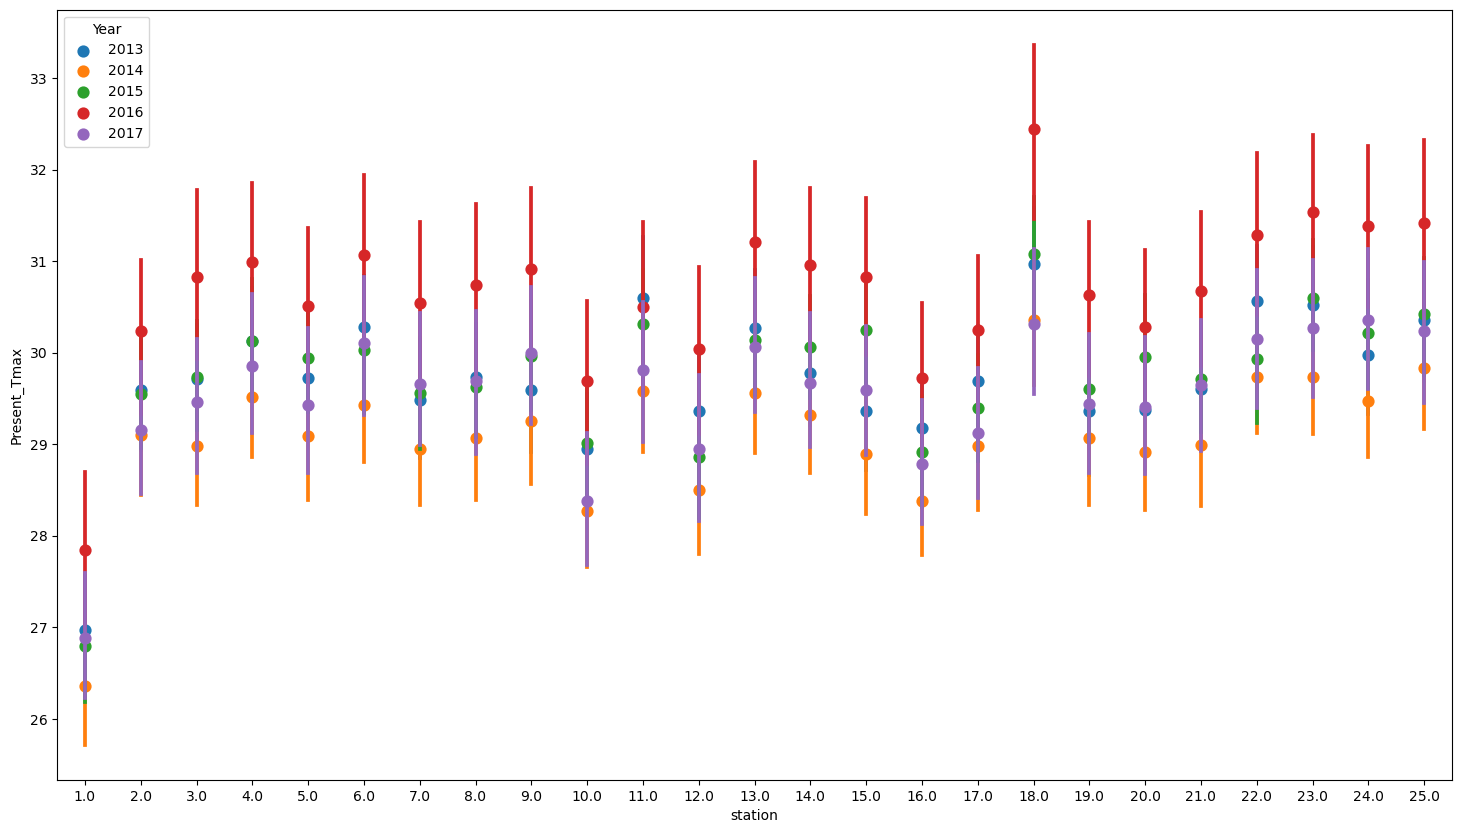

In [27]:
plt.figure(figsize=(18,10))
sns.pointplot(x='station', y='Present_Tmax', data=df, hue='Year',join=False)
plt.show()

<Figure size 1800x1000 with 0 Axes>

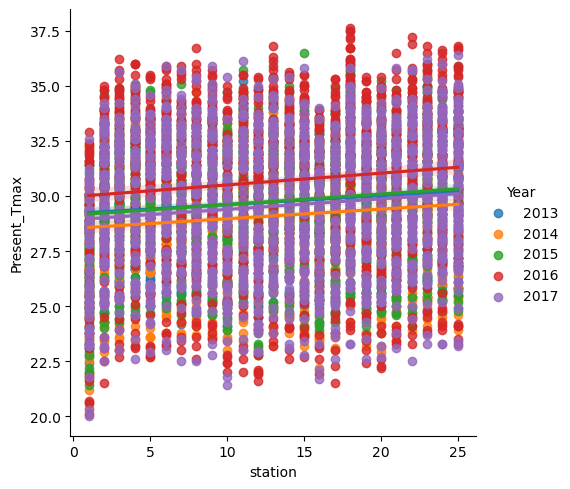

In [28]:
plt.figure(figsize=(18,10))
sns.lmplot(x="station", y="Present_Tmax", hue='Year', data=df)
plt.show()

We can see 2016 is hottest year and 2014 is coolest year. It will be interesting to explore these two year independently.
Year 2017 is much cooler compare to Year 2016. Precious relife to people in 2017

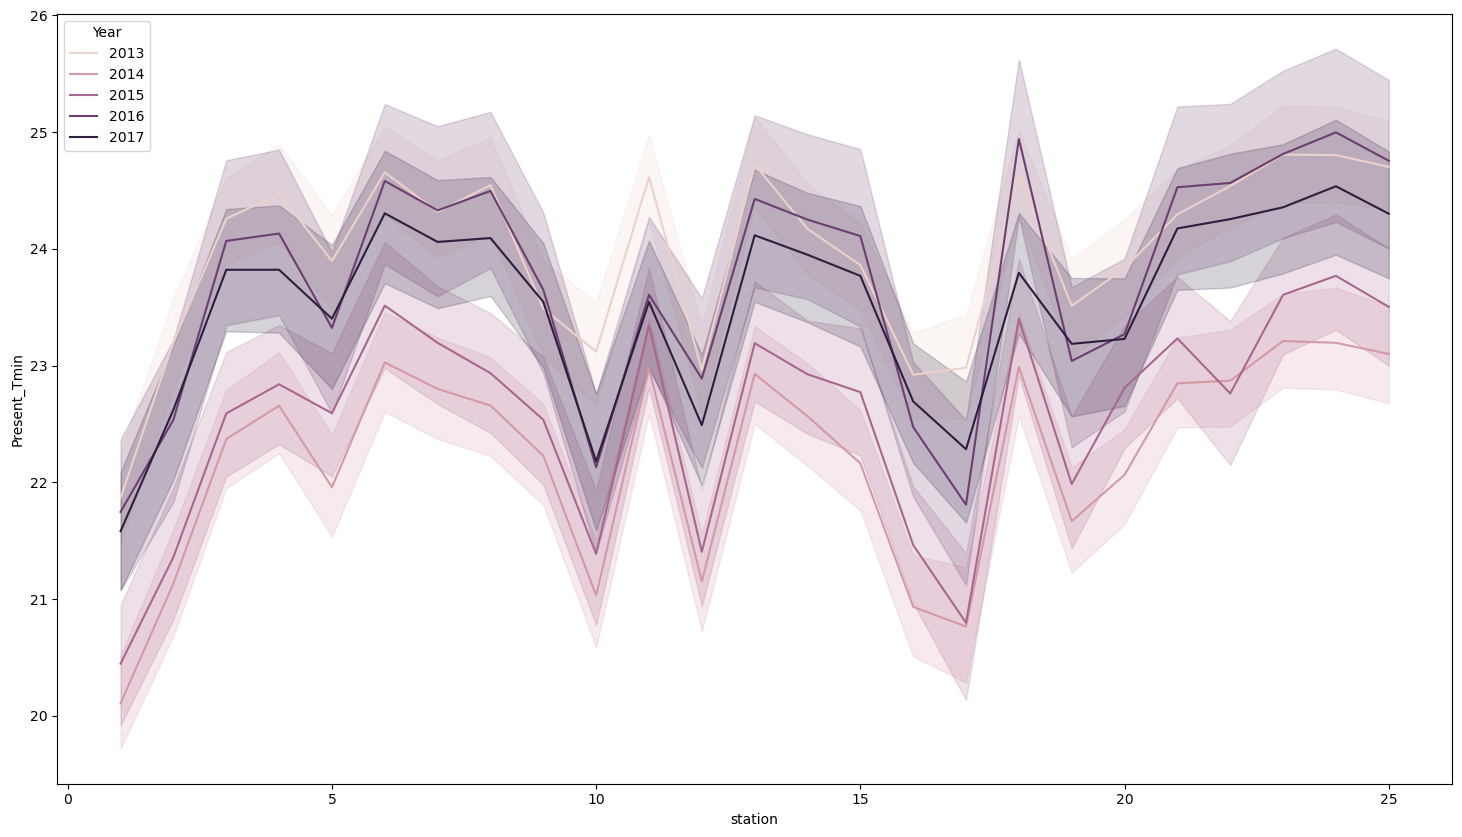

In [29]:
plt.figure(figsize=(18,10))
sns.lineplot(x="station", y="Present_Tmin", hue='Year', data=df)
plt.show()

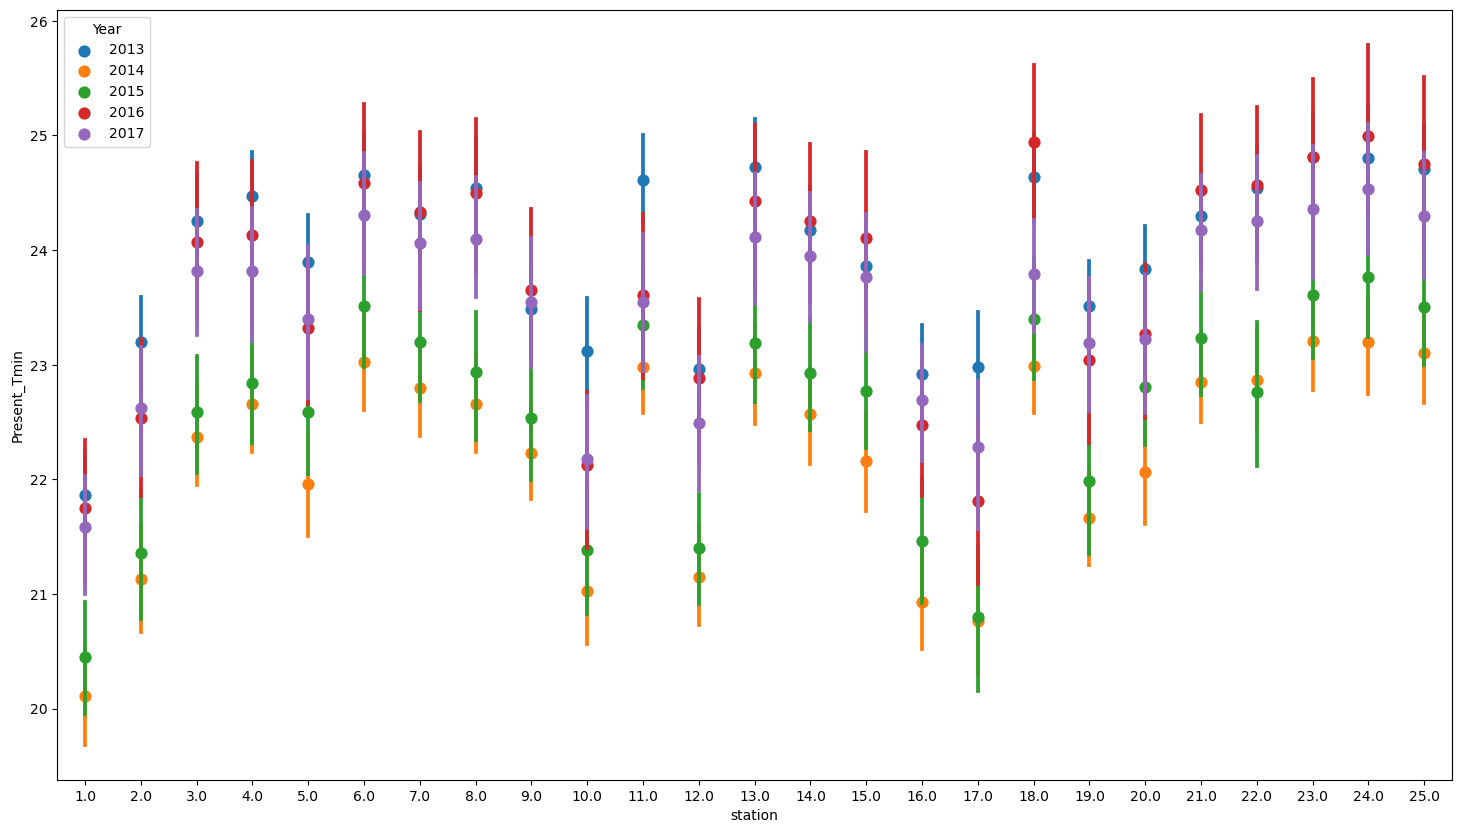

In [30]:
plt.figure(figsize=(18,10))
sns.pointplot(x="station", y="Present_Tmin", hue='Year', data=df,join=False)
plt.show()

<Figure size 1800x1000 with 0 Axes>

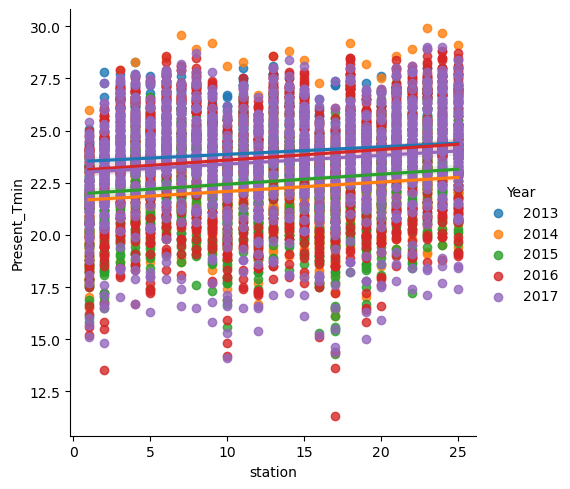

In [31]:
plt.figure(figsize=(18,10))
sns.lmplot(x="station", y="Present_Tmin", hue='Year', data=df)
plt.show()

Highest Present Minimum Temperature recorded at Station 24 inspite of Not having Highest Present Maximum Temperature. This is implies that over day period minimum temperature drop recorded at station 24.

<Axes: xlabel='Month', ylabel='Solar radiation'>

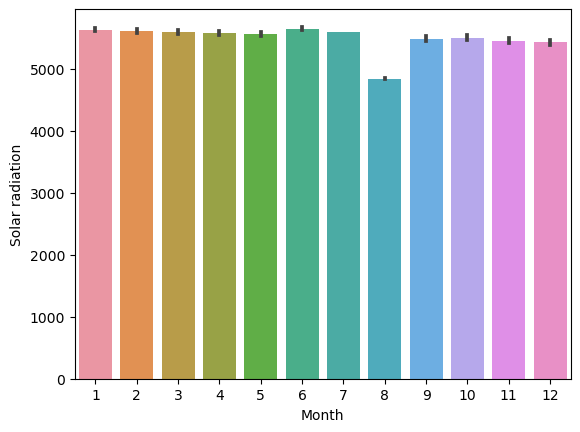

In [32]:
sns.barplot(x=df['Month'], y=df['Solar radiation'])

In [33]:
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7588.000000   7588.000000   7588.000000  7588.000000  7588.000000   
mean     13.014101     29.748366     23.195809    56.724969    88.360823   
std       7.217858      2.967401      2.400880    14.626559     7.199456   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.600000    45.960243    84.203724   
50%      13.000000     29.900000     23.400000    55.023199    89.784122   
75%      19.000000     32.000000     24.800000    67.115099    93.742725   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7588.000000       7588.000000  7588.000000  7588.000000   
mean          29.620128         23.511786     7.094097    62.492606   
std            2.943496          2.342579     2.177034    33.686158   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673756         22.086820     5.675358    37.206201   
50%           29.709537         23.758249     6.547838    56.898324   
75%           31.711109         25.155660     8.028960    84.235666   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...          lat         lon          DEM        Slope  \
count  7588.000000  ...  7588.000000  7588.00000  7588.000000  7588.000000   
mean      0.368510  ...    37.544792   126.99142    61.918136     1.259755   
std       0.262260  ...     0.050428     0.07922    54.323529     1.372748   
min       0.000000  ...    37.456200   126.82600    12.370000     0.098500   
25%       0.146546  ...    37.510200   126.93700    28.700000     0.271300   
50%       0.315706  ...    37.550700   126.99500    45.716000     0.618000   
75%       0.574174  ...    37.577600   127.04200    59.832400     1.767800   
max       0.967277  ...    37.645000   127.13500   212.335000     5.178200   

       Solar radiation    Next_Tmax    Next_Tmin        Month          Day  \
count      7588.000000  7588.000000  7588.000000  7588.000000  7588.000000   
mean       5343.724208    30.241526    22.910820     7.068134    16.337375   
std         429.782561     3.111807     2.482256     2.242389     8.216880   
min        4329.520508    17.400000    11.300000     1.000000     7.000000   
25%        5001.485717    28.200000    21.300000     7.000000     8.000000   
50%        5441.987305    30.400000    23.100000     7.000000    16.000000   
75%        5729.485840    32.600000    24.600000     8.000000    24.000000   
max        5992.895996    38.900000    29.800000    12.000000    31.000000   

              Year  
count  7588.000000  
mean   2014.991697  
std       1.410877  
min    2013.000000  
25%    2014.000000  
50%    2015.000000  
75%    2016.000000  
max    2017.000000  

[8 rows x 27 columns]

In [34]:
df.corr()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.113301      0.133282    -0.067846   
Present_Tmax      0.113301      1.000000      0.615208    -0.209059   
Present_Tmin      0.133282      0.615208      1.000000     0.122200   
LDAPS_RHmin      -0.067846     -0.209059      0.122200     1.000000   
LDAPS_RHmax      -0.169351     -0.306943     -0.018576     0.578358   
LDAPS_Tmax_lapse  0.069856      0.573777      0.467904    -0.569580   
LDAPS_Tmin_lapse  0.105277      0.628705      0.772061     0.085237   
LDAPS_WS          0.005822     -0.125952     -0.038779     0.289422   
LDAPS_LH         -0.132129      0.134246     -0.012817    -0.072195   
LDAPS_CC1         0.006539     -0.316333      0.084348     0.612831   
LDAPS_CC2         0.003526     -0.216976      0.090038     0.744774   
LDAPS_CC3        -0.000161     -0.146391     -0.004719     0.688069   
LDAPS_CC4         0.005005     -0.143069     -0.046694     0.513937   
LDAPS_PPT1       -0.001954     -0.114917      0.111577     0.259039   
LDAPS_PPT2       -0.007635     -0.104779      0.066207     0.389572   
LDAPS_PPT3       -0.013865     -0.127248     -0.052428     0.237512   
LDAPS_PPT4       -0.011085     -0.107295     -0.070391     0.167311   
lat              -0.239118     -0.054134     -0.081417     0.085027   
lon              -0.118845      0.007695     -0.045174    -0.077590   
DEM              -0.256706     -0.189439     -0.254084     0.100684   
Slope            -0.091721     -0.107079     -0.148423     0.122454   
Solar radiation  -0.021194     -0.022114      0.059765     0.242168   
Next_Tmax         0.107747      0.610357      0.463523    -0.446824   
Next_Tmin         0.128184      0.621048      0.796975     0.093249   
Month             0.001211     -0.003266     -0.010210    -0.053499   
Day              -0.000996     -0.154366     -0.115693    -0.063464   
Year              0.001474      0.056002      0.037457    -0.002147   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.169351          0.069856          0.105277  0.005822   
Present_Tmax        -0.306943          0.573777          0.628705 -0.125952   
Present_Tmin        -0.018576          0.467904          0.772061 -0.038779   
LDAPS_RHmin          0.578358         -0.569580          0.085237  0.289422   
LDAPS_RHmax          1.000000         -0.377293         -0.118965  0.131269   
LDAPS_Tmax_lapse    -0.377293          1.000000          0.653425 -0.316011   
LDAPS_Tmin_lapse    -0.118965          0.653425          1.000000 -0.134652   
LDAPS_WS             0.131269         -0.316011         -0.134652  1.000000   
LDAPS_LH             0.238986          0.043663         -0.139675  0.004427   
LDAPS_CC1            0.435937         -0.440878          0.008714  0.285349   
LDAPS_CC2            0.390620         -0.525380          0.046537  0.257226   
LDAPS_CC3            0.224734         -0.542728         -0.044998  0.238155   
LDAPS_CC4            0.127242         -0.429739         -0.079536  0.218870   
LDAPS_PPT1           0.268019         -0.115659          0.034956  0.141503   
LDAPS_PPT2           0.227581         -0.248369         -0.002743  0.181634   
LDAPS_PPT3           0.132436         -0.193749         -0.093116  0.147199   
LDAPS_PPT4           0.118101         -0.170415         -0.103541  0.134428   
lat                  0.194820         -0.044052         -0.099452  0.033025   
lon                  0.025563          0.091568         -0.024703 -0.063009   
DEM                  0.176557         -0.181433         -0.198396  0.188540   
Slope                0.219436         -0.163891         -0.187864  0.169223   
Solar radiation      0.146622          0.047414          0.157763  0.120630   
Next_Tmax           -0.289788          0.835729          0.592119 -0.351107   
Next_Tmin           -0.076415          0.589963          0.886513 -0.102021   
Month               -0.039424         -0.022279        

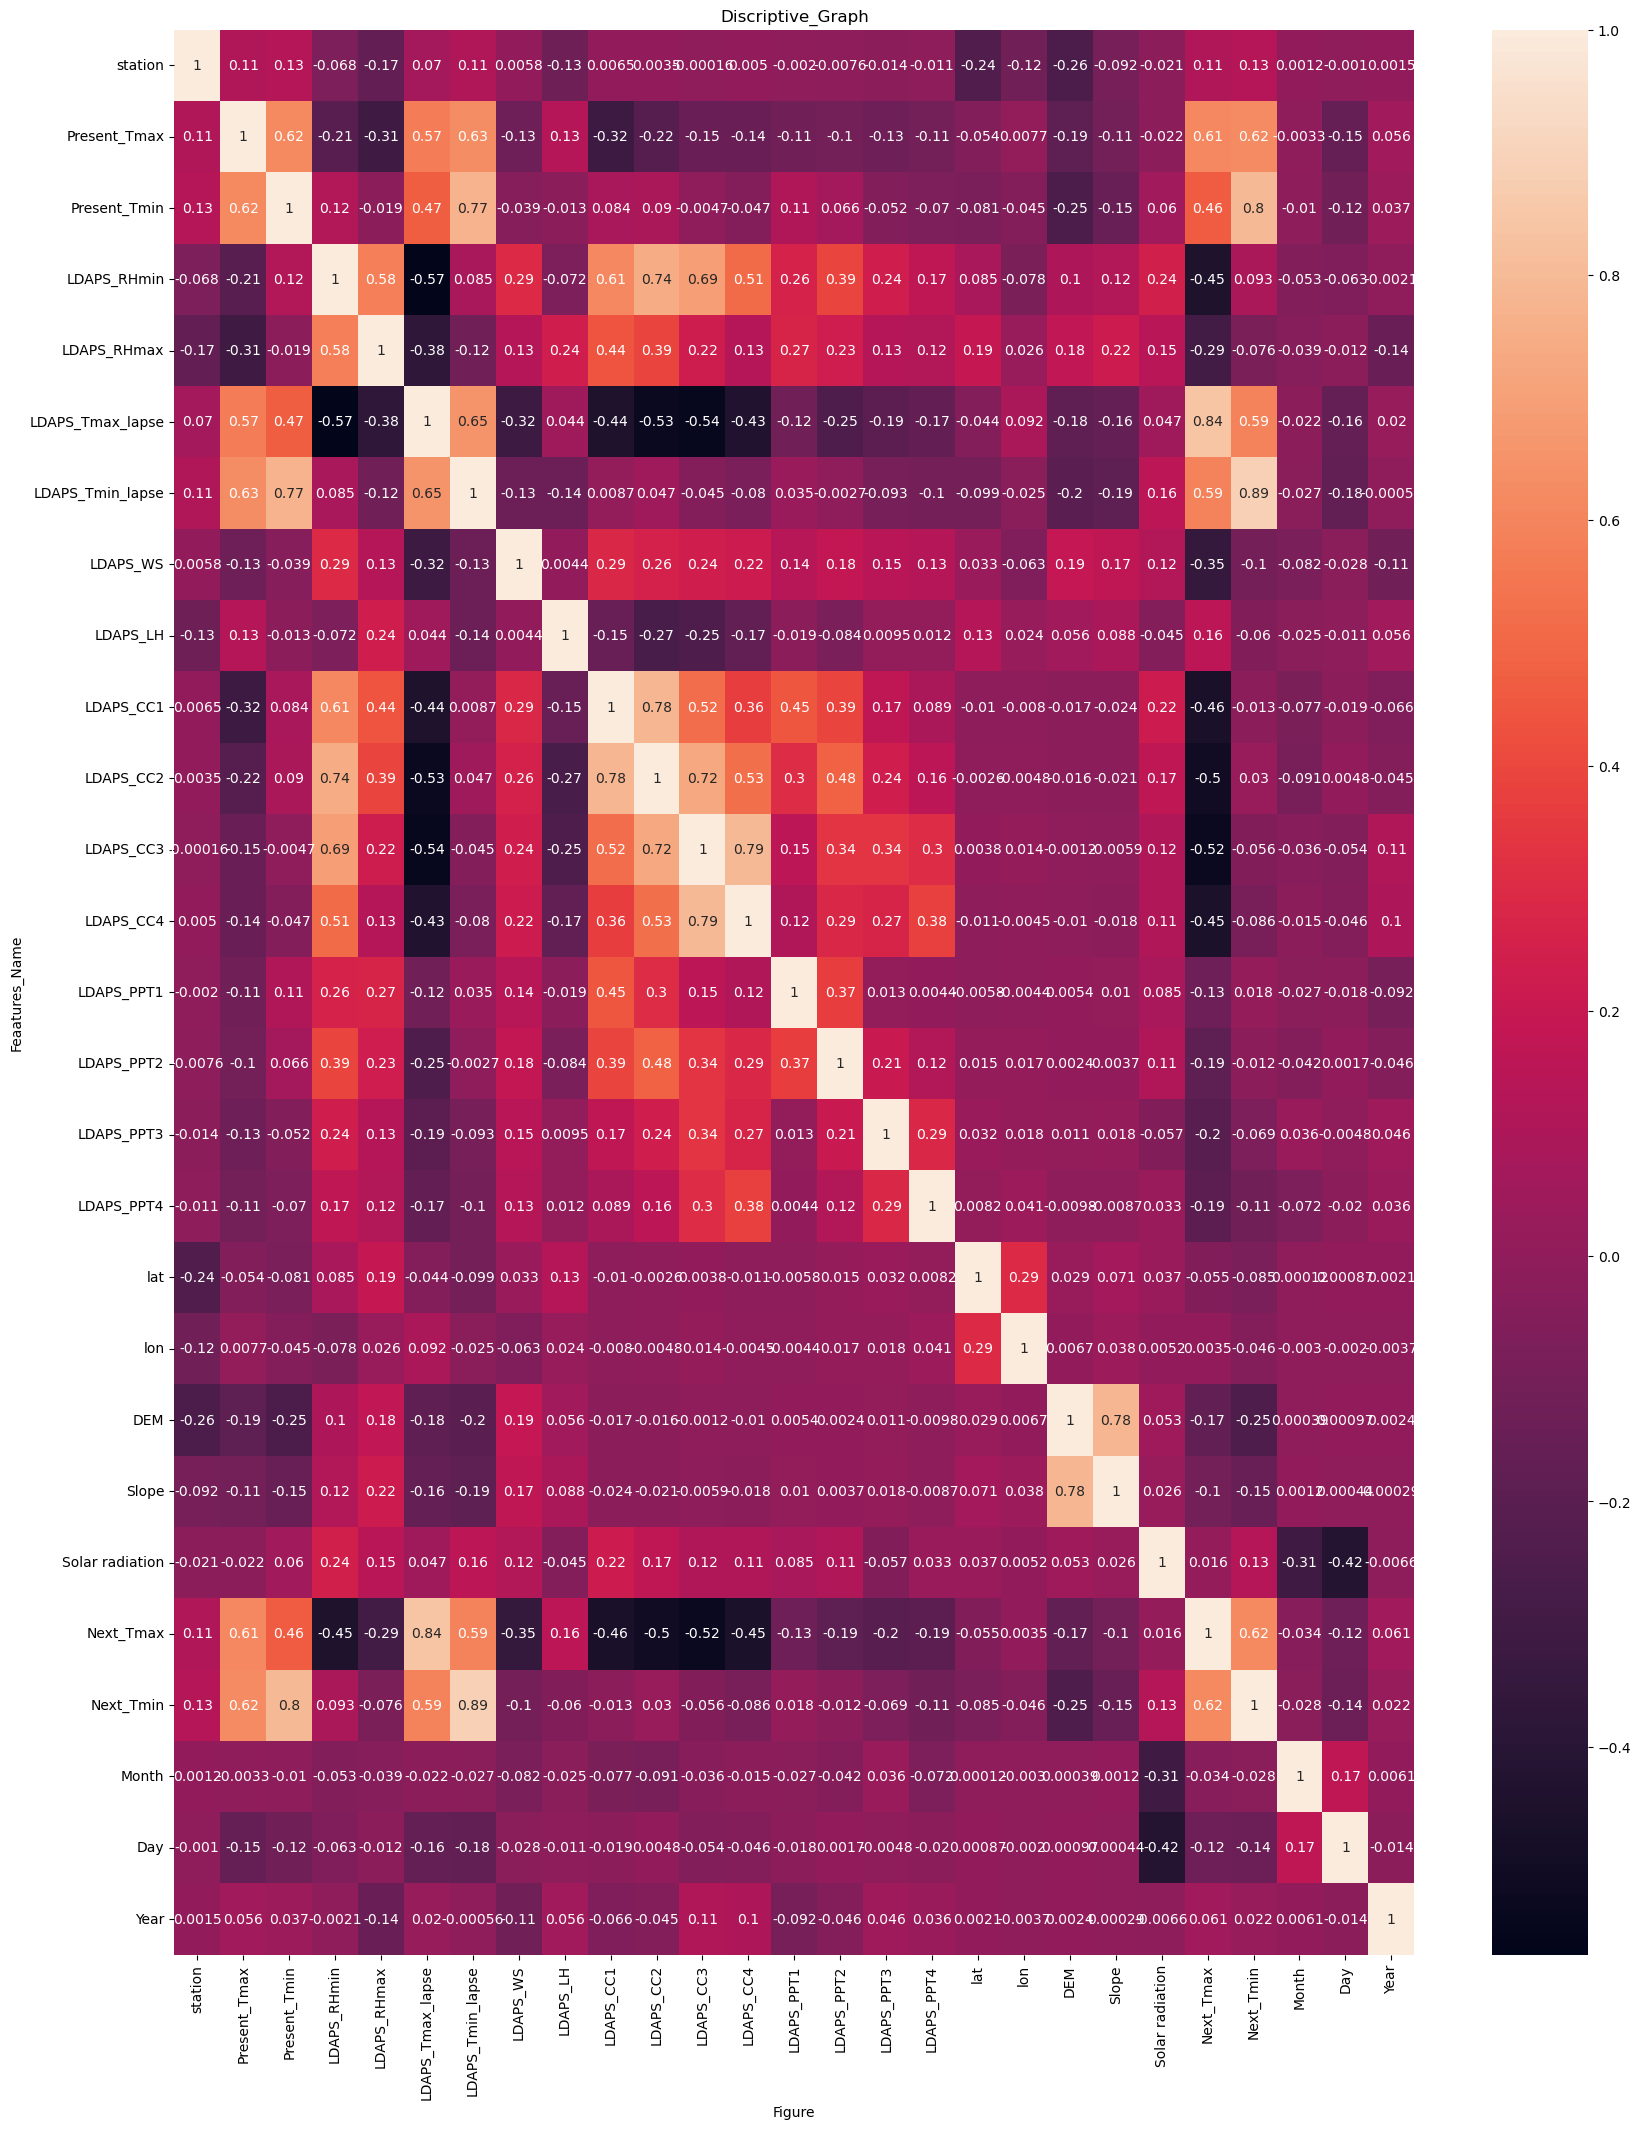

In [35]:
plt.figure(figsize=(20,25))
sns.heatmap(df.corr(),annot=True)
plt.xlabel('Figure')
plt.ylabel('Feaatures_Name')
plt.title('Discriptive_Graph')
plt.show()

# Target variable

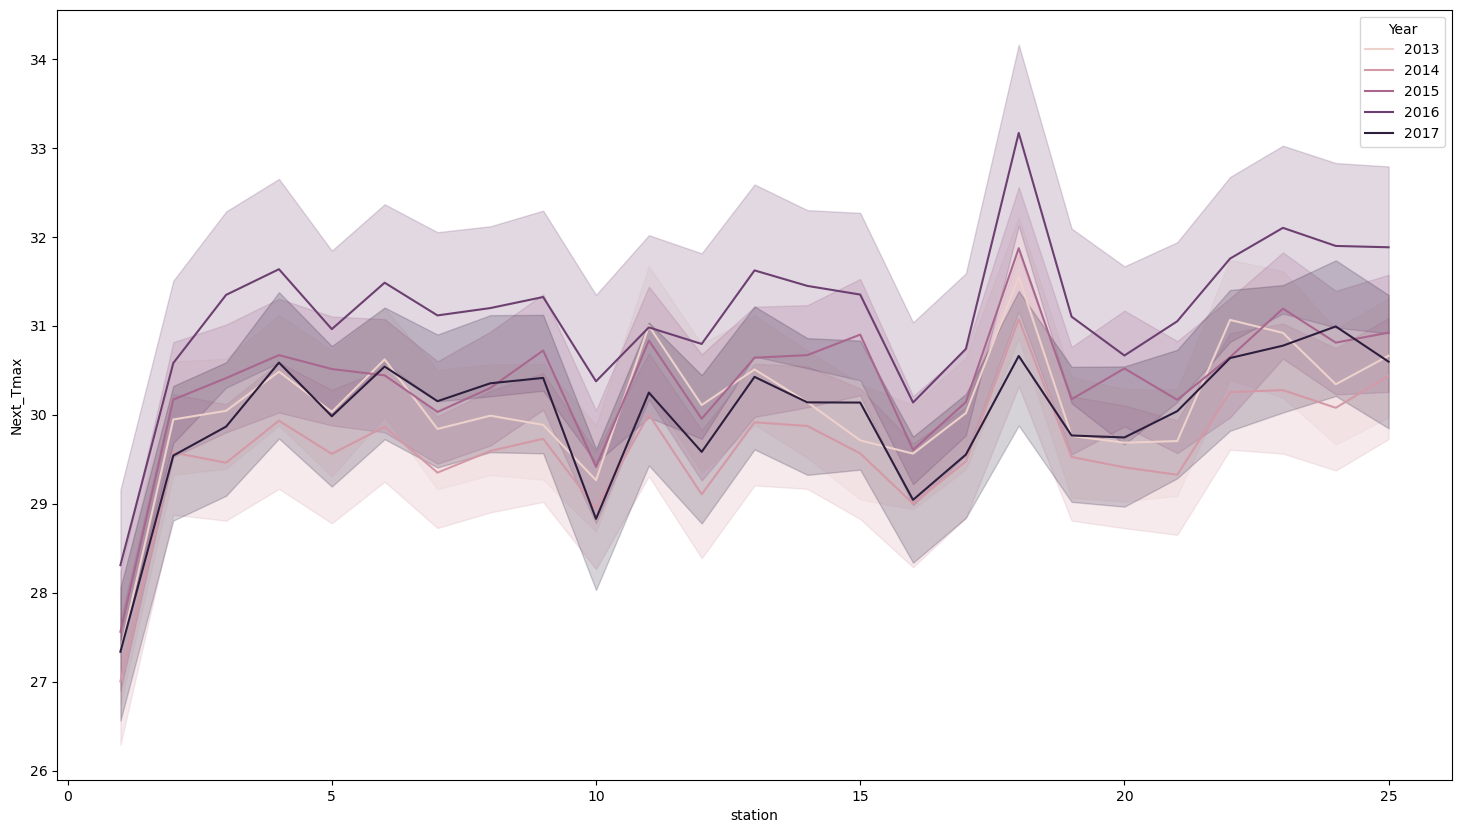

In [36]:
plt.figure(figsize=(18,10))
sns.lineplot(x="station", y="Next_Tmax", hue='Year', data=df)
plt.show()

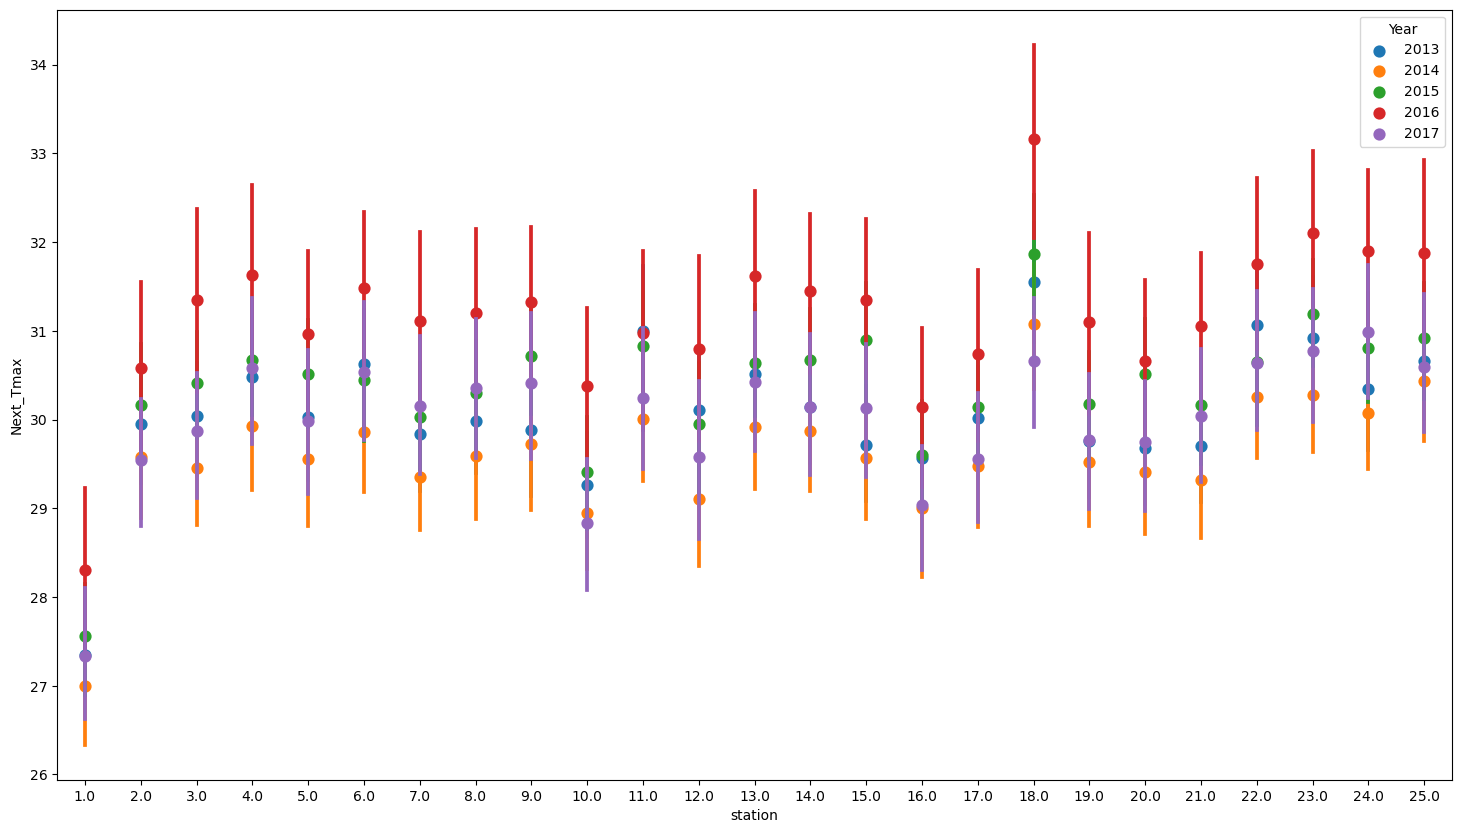

In [37]:
plt.figure(figsize=(18,10))
sns.pointplot(x="station", y="Next_Tmax", hue='Year', data=df,join=False)
plt.show()

<Figure size 1800x1000 with 0 Axes>

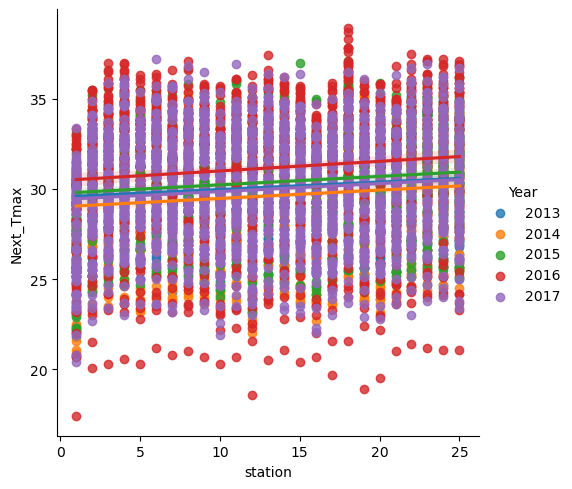

In [38]:
plt.figure(figsize=(18,10))
sns.lmplot(x="station", y="Next_Tmax", hue='Year', data=df)
plt.show()

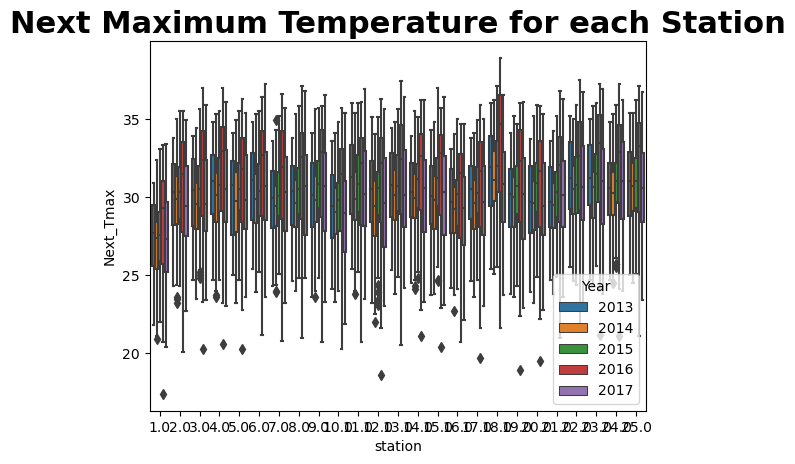

In [39]:
plt.figure()
sns.boxplot(x="station", y="Next_Tmax", hue='Year', data=df)
plt.title('Next Maximum Temperature for each Station', fontsize=22, fontweight='bold')
plt.show()

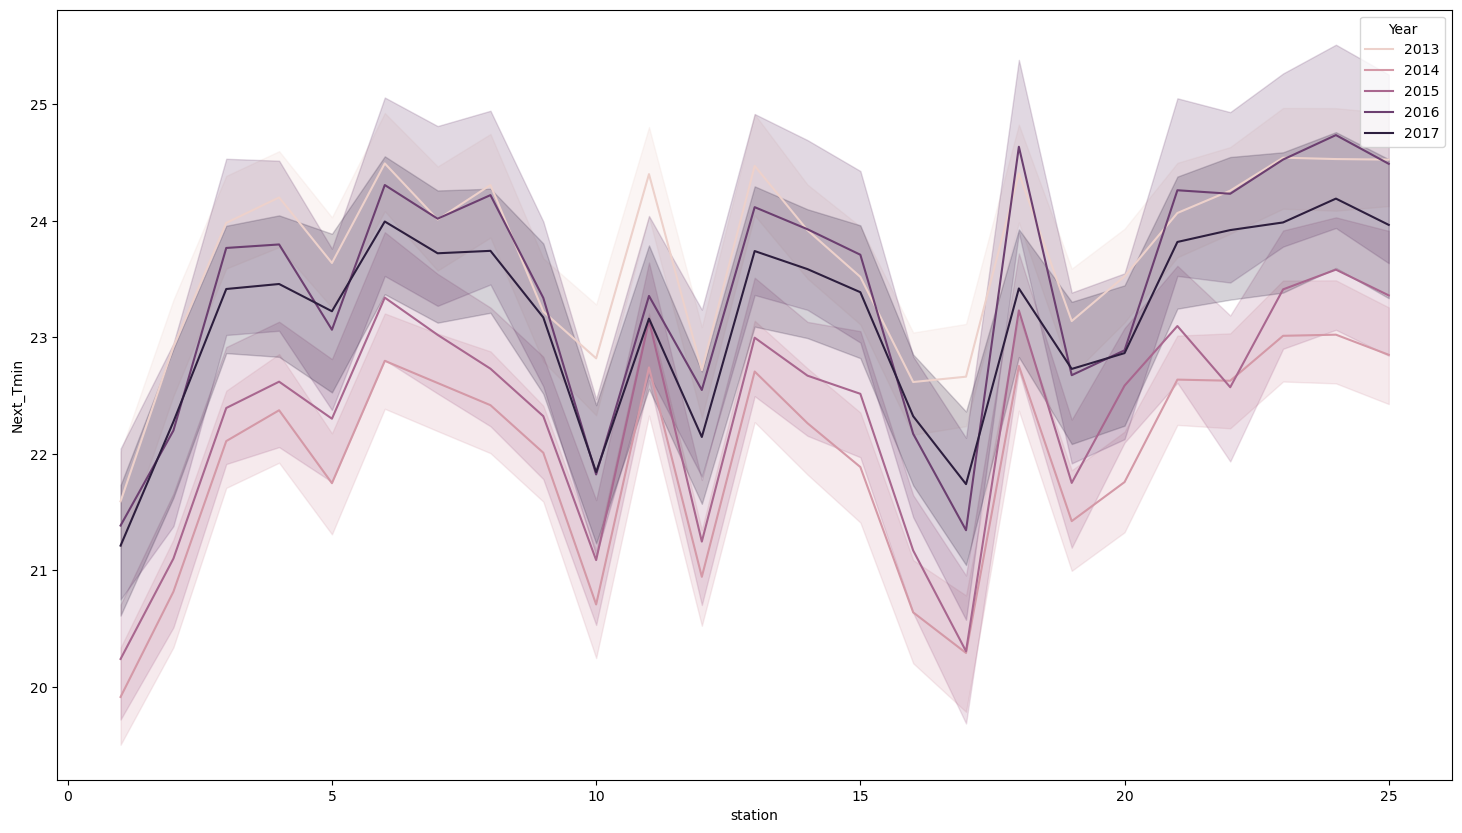

In [40]:
plt.figure(figsize=(18,10))
sns.lineplot(x="station", y="Next_Tmin", hue='Year', data=df)
plt.show()

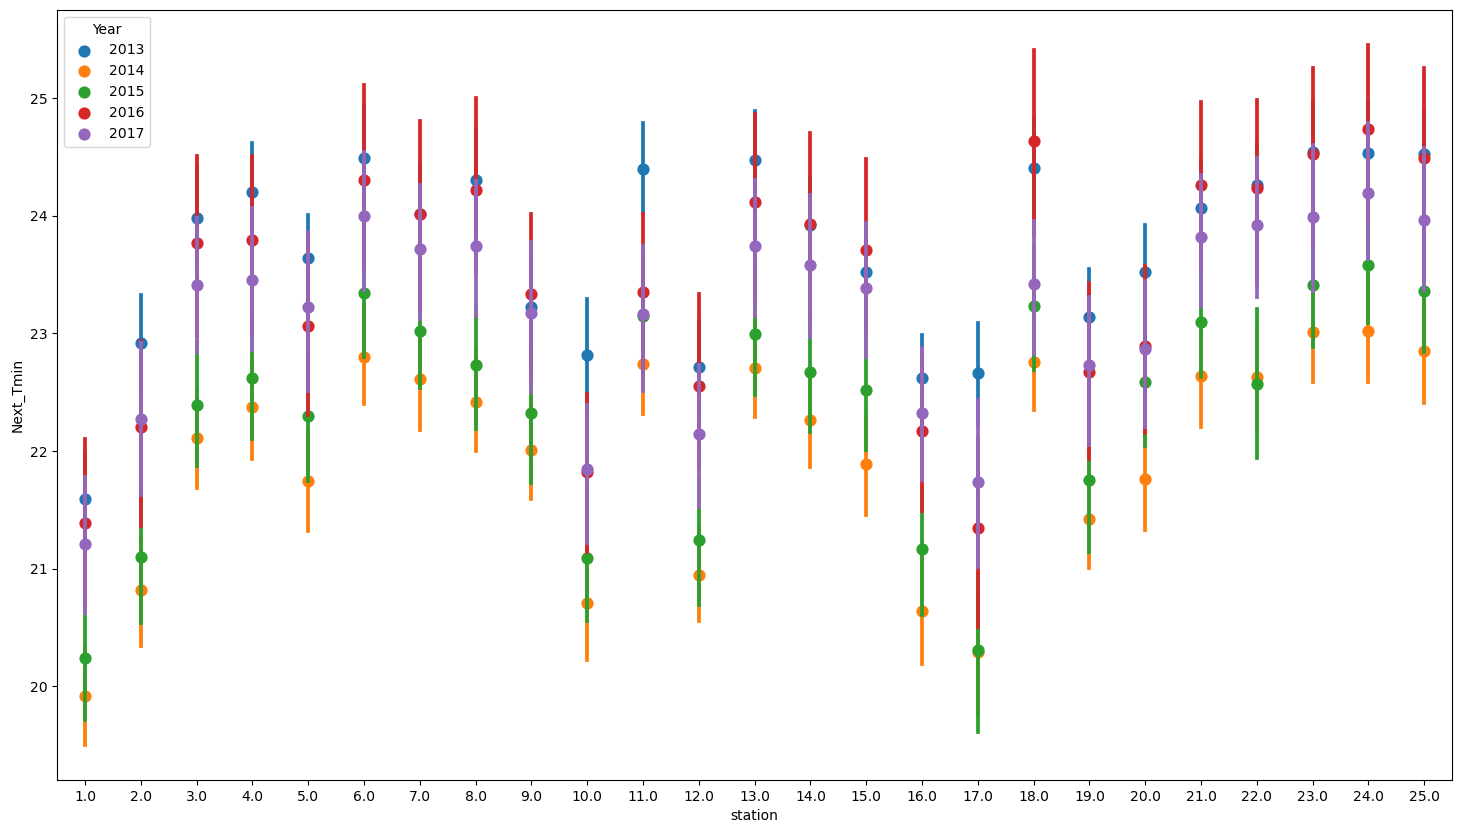

In [41]:
plt.figure(figsize=(18,10))
sns.pointplot(x="station", y="Next_Tmin", hue='Year', data=df,join=False)
plt.show()

<Figure size 1800x1000 with 0 Axes>

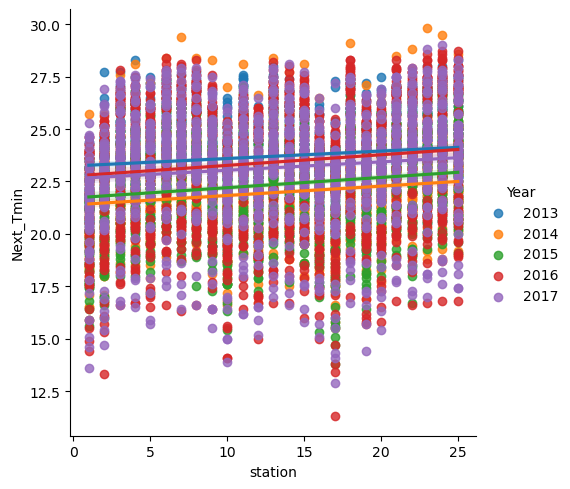

In [42]:
plt.figure(figsize=(18,10))
sns.lmplot(x="station", y="Next_Tmin", hue='Year', data=df)
plt.show()

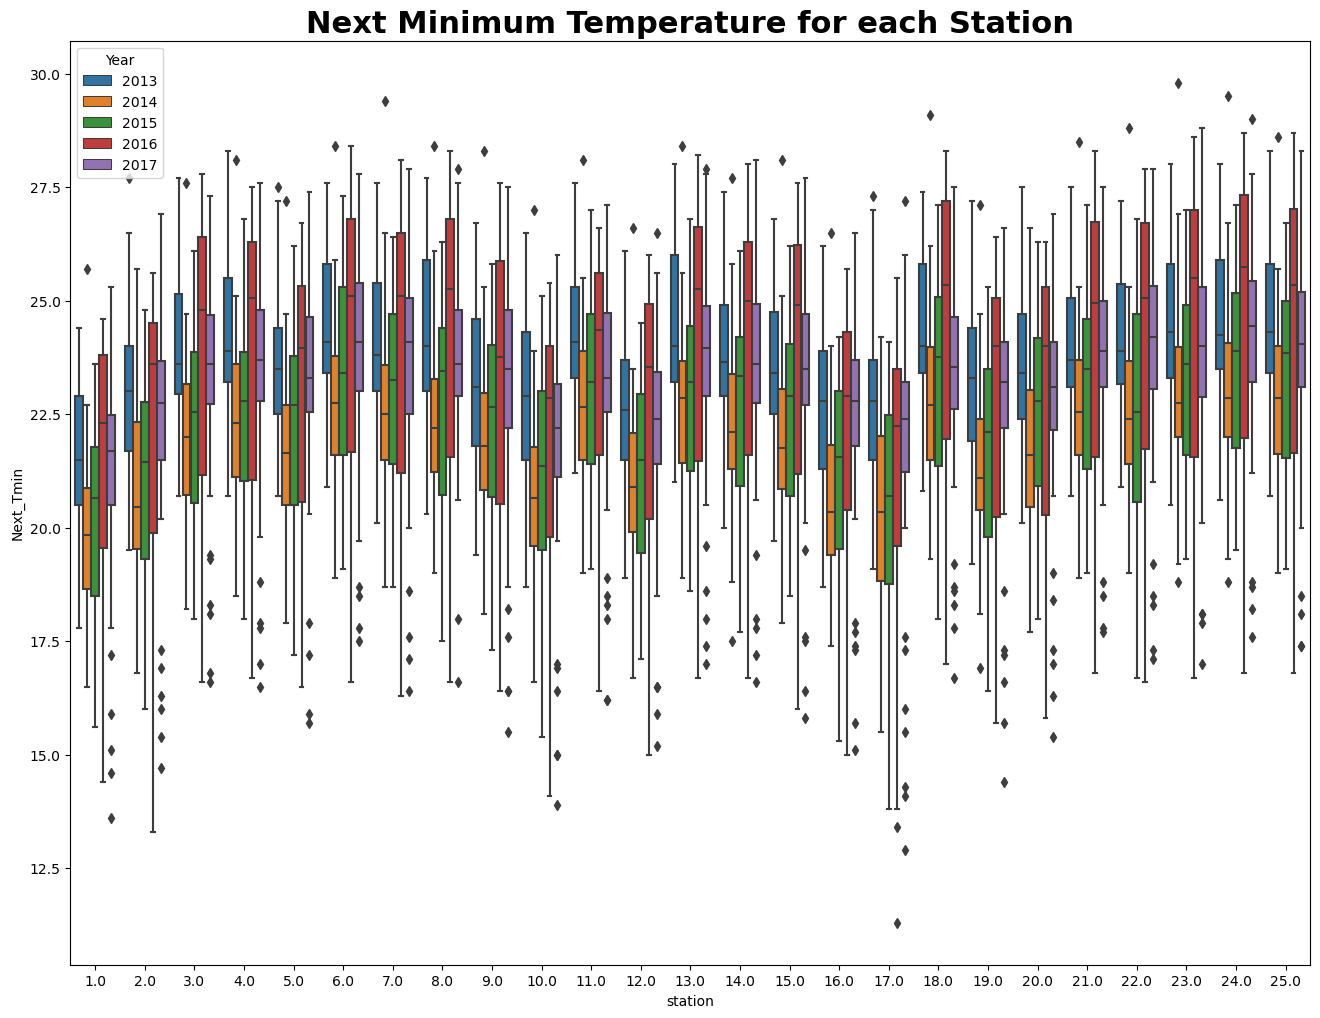

In [43]:
plt.figure(figsize=(16,12))
sns.boxplot(x="station", y="Next_Tmin", hue='Year', data=df)
plt.title('Next Minimum Temperature for each Station', fontsize=22, fontweight='bold')
plt.show()

we can notice the station 18 has highest temperature collection for both Next_Tmax and Next_Tmin targets.
Maximum temperature difference at same station occur in station 17.

# Next_Tmax Vs Cloud cover

<Axes: title={'center': 'Next day max Temperature Vs Next-day 1st 6-hour cloud cover'}, xlabel='LDAPS_CC1', ylabel='Next_Tmax'>

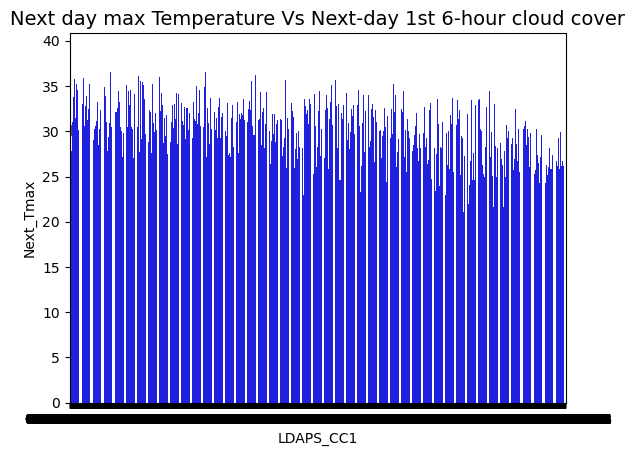

In [44]:
plt.title('Next day max Temperature Vs Next-day 1st 6-hour cloud cover',fontsize=14)
sns.barplot(x='LDAPS_CC1',y='Next_Tmax',data=df,color="blue")

<Axes: title={'center': 'Next day max Temperature Vs Next-day 1st 6-hour cloud cover'}, xlabel='LDAPS_CC1', ylabel='Next_Tmax'>

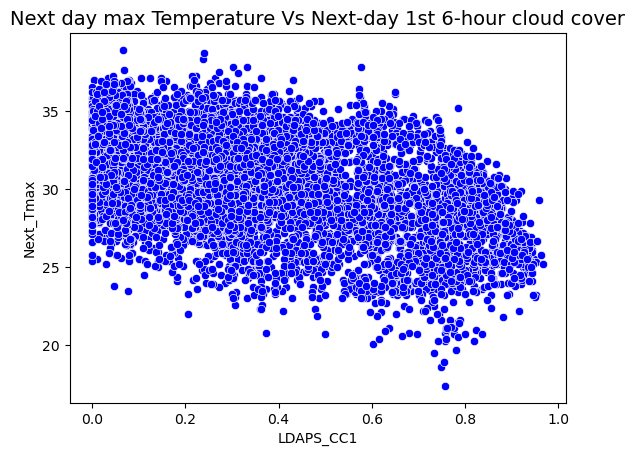

In [45]:
plt.title('Next day max Temperature Vs Next-day 1st 6-hour cloud cover',fontsize=14)
sns.scatterplot(x='LDAPS_CC1',y='Next_Tmax',data=df,color="blue")

<Axes: title={'center': 'Next day max Temperature Vs Next-day 2nd 6-hour cloud cover'}, xlabel='LDAPS_CC2', ylabel='Next_Tmax'>

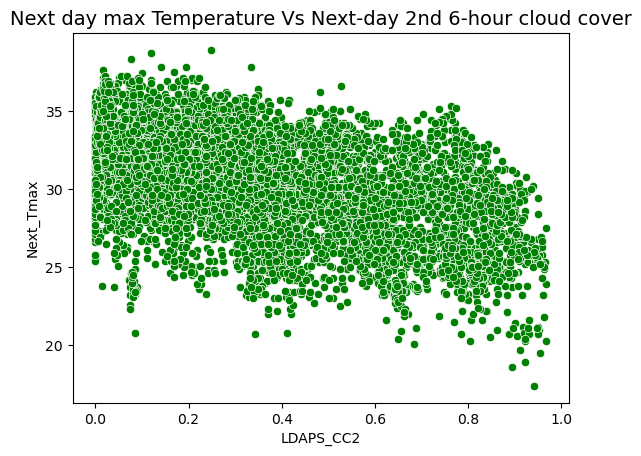

In [46]:
plt.title('Next day max Temperature Vs Next-day 2nd 6-hour cloud cover',fontsize=14)
sns.scatterplot(x='LDAPS_CC2',y='Next_Tmax',data=df,color="green")

<Axes: title={'center': 'Next day max Temperature Vs Next-day 3rd 6-hour cloud cover'}, xlabel='LDAPS_CC3', ylabel='Next_Tmax'>

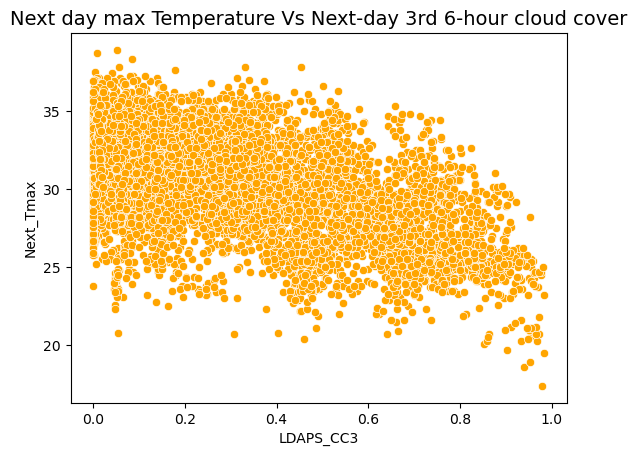

In [47]:
plt.title('Next day max Temperature Vs Next-day 3rd 6-hour cloud cover',fontsize=14)
sns.scatterplot(x='LDAPS_CC3',y='Next_Tmax',data=df,color="orange")

<Axes: title={'center': 'Next day max Temperature Vs Next-day 4th 6-hour cloud cover'}, xlabel='LDAPS_CC4', ylabel='Next_Tmax'>

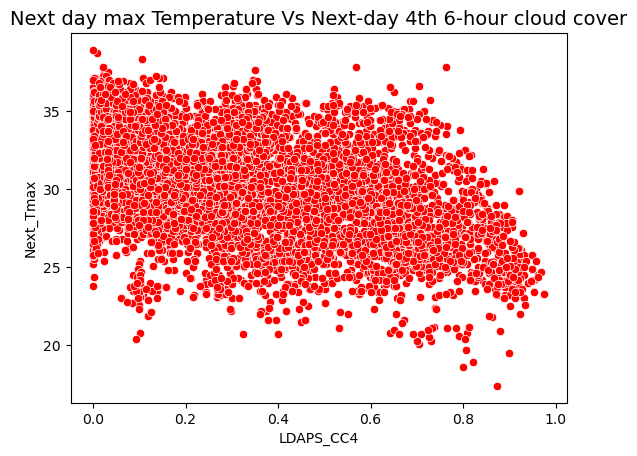

In [48]:
plt.title('Next day max Temperature Vs Next-day 4th 6-hour cloud cover',fontsize=14)
sns.scatterplot(x='LDAPS_CC4',y='Next_Tmax',data=df,color="red")

Irrespective of 6 hr quarter in 24 hr day time, Next-day Temperature Maximum decreases as cloud cover increases beyond 0.6.

# Next_Tmin Vs Cloud cover

<Axes: title={'center': 'Next day min Temperature Vs Next-day 1st 6-hour cloud cover'}, xlabel='LDAPS_CC1', ylabel='Next_Tmin'>

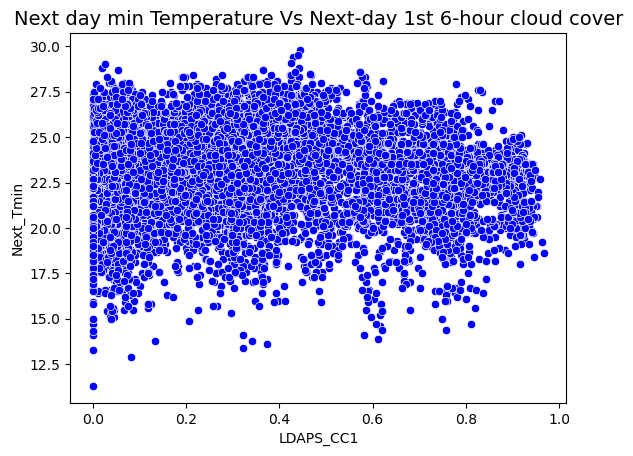

In [49]:
plt.title('Next day min Temperature Vs Next-day 1st 6-hour cloud cover',fontsize=14)
sns.scatterplot(x='LDAPS_CC1',y='Next_Tmin',data=df,color="blue")

<Axes: title={'center': 'Next day min Temperature Vs Next-day 2nd 6-hour cloud cover'}, xlabel='LDAPS_CC2', ylabel='Next_Tmin'>

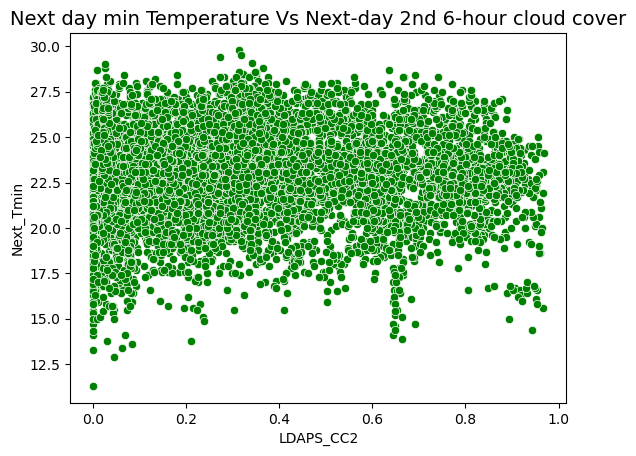

In [50]:
plt.title('Next day min Temperature Vs Next-day 2nd 6-hour cloud cover',fontsize=14)
sns.scatterplot(x='LDAPS_CC2',y='Next_Tmin',data=df,color="green")

<Axes: title={'center': 'Next day min Temperature Vs Next-day 3rd 6-hour cloud cover'}, xlabel='LDAPS_CC3', ylabel='Next_Tmin'>

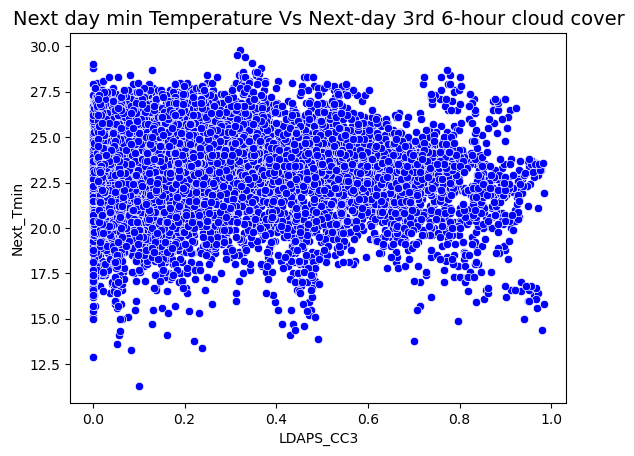

In [51]:
plt.title('Next day min Temperature Vs Next-day 3rd 6-hour cloud cover',fontsize=14)
sns.scatterplot(x='LDAPS_CC3',y='Next_Tmin',data=df,color="blue")

<Axes: title={'center': 'Next day min Temperature Vs Next-day 4th 6-hour cloud cover'}, xlabel='LDAPS_CC4', ylabel='Next_Tmin'>

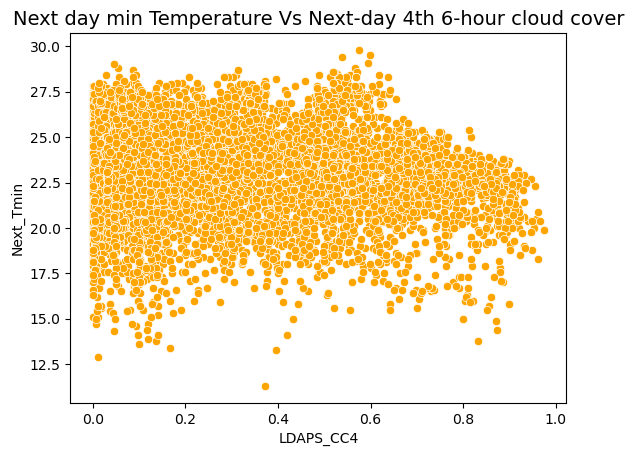

In [52]:
plt.title('Next day min Temperature Vs Next-day 4th 6-hour cloud cover',fontsize=14)
sns.scatterplot(x='LDAPS_CC4',y='Next_Tmin',data=df,color="orange")

We can say that Next_Tmin remains unaffected by cloud cover.

# solar radiation Vs Cloud cover

<Axes: title={'center': 'Solar radiation Vs Next-day 1st 6-hour cloud cover'}, xlabel='LDAPS_CC1', ylabel='Solar radiation'>

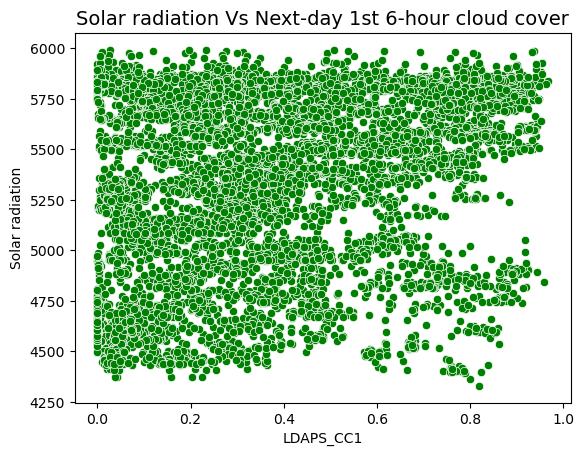

In [53]:
plt.title('Solar radiation Vs Next-day 1st 6-hour cloud cover',fontsize=14)
sns.scatterplot(x='LDAPS_CC1',y='Solar radiation',data=df,color="g")

<Axes: title={'center': 'Solar radiation Vs Next-day 2nd 6-hour cloud cover'}, xlabel='LDAPS_CC2', ylabel='Solar radiation'>

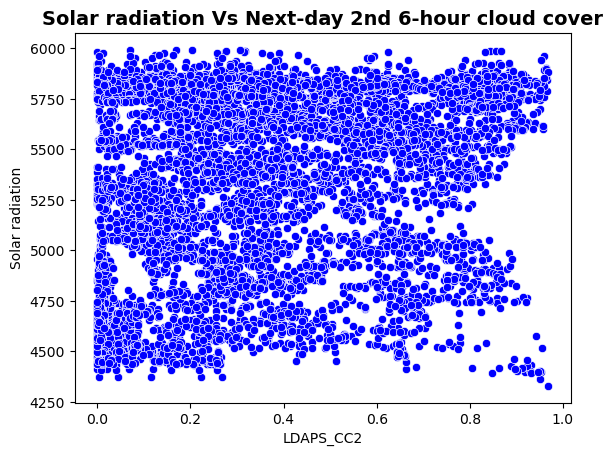

In [54]:
plt.title('Solar radiation Vs Next-day 2nd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC2',y='Solar radiation',data=df,color="b")

<Axes: title={'center': 'Solar radiation Vs Next-day 3rd 6-hour cloud cover'}, xlabel='LDAPS_CC3', ylabel='Solar radiation'>

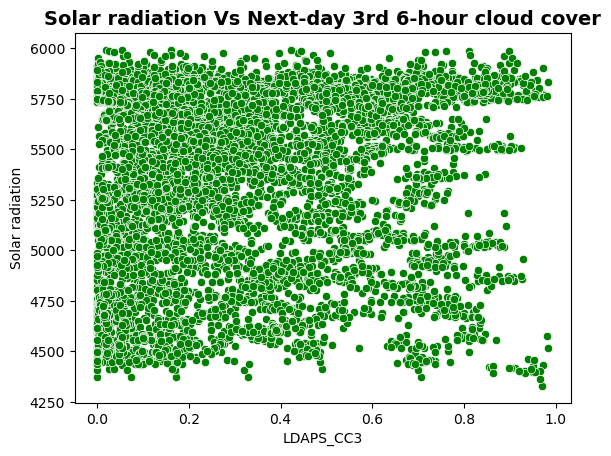

In [55]:
plt.title('Solar radiation Vs Next-day 3rd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC3',y='Solar radiation',data=df,color="g")

<Axes: title={'center': 'Solar radiation Vs Next-day 4th 6-hour cloud cover'}, xlabel='LDAPS_CC4', ylabel='Solar radiation'>

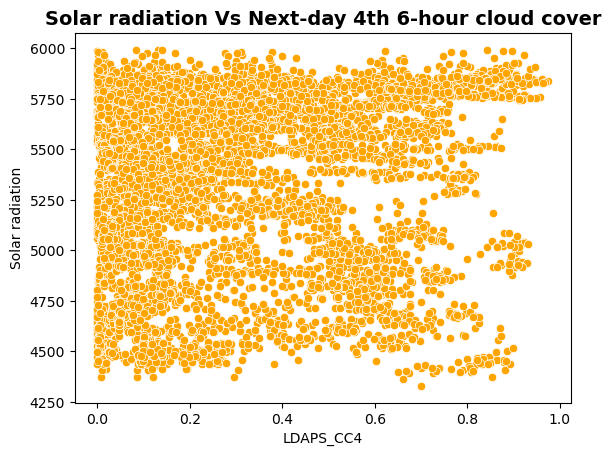

In [56]:
plt.title('Solar radiation Vs Next-day 4th 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4',y='Solar radiation',data=df,color="orange")

We can definitely say that for cloud cover greater than 0.7 high value solar radiation contributed most.

# Precipitation VS Solar radiation

<Axes: title={'center': 'Solar radiation Vs Next-day 1st 6-hour cloud cover'}, xlabel='LDAPS_PPT1', ylabel='Solar radiation'>

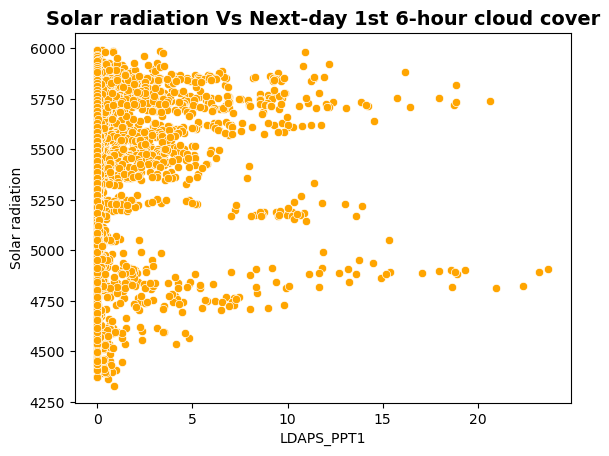

In [57]:
plt.title('Solar radiation Vs Next-day 1st 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_PPT1',y='Solar radiation',data=df,color="orange")

<Axes: title={'center': 'Solar radiation Vs Next-day 2nd 6-hour cloud cover'}, xlabel='LDAPS_PPT2', ylabel='Solar radiation'>

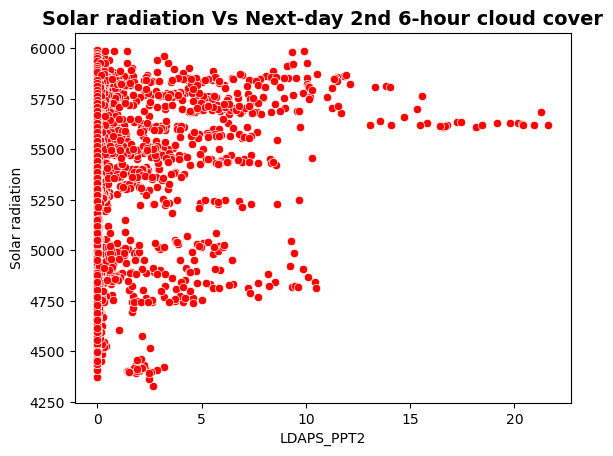

In [58]:
plt.title('Solar radiation Vs Next-day 2nd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_PPT2',y='Solar radiation',data=df,color="red")

<Axes: title={'center': 'Solar radiation Vs Next-day 3rd 6-hour cloud cover'}, xlabel='LDAPS_PPT3', ylabel='Solar radiation'>

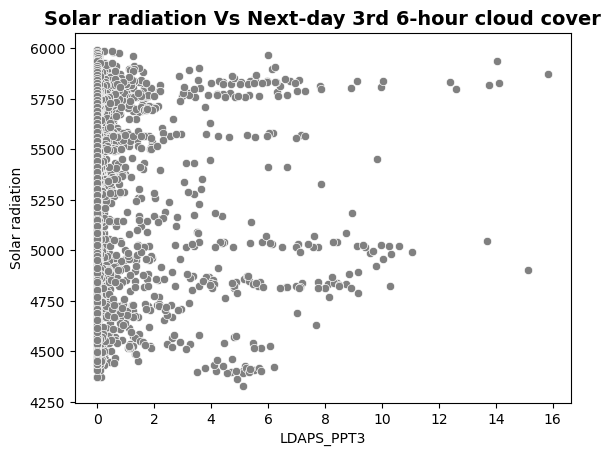

In [59]:
plt.title('Solar radiation Vs Next-day 3rd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_PPT3',y='Solar radiation',data=df,color="grey")

<Axes: title={'center': 'Solar radiation Vs Next-day 4th 6-hour cloud cover'}, xlabel='LDAPS_PPT4', ylabel='Solar radiation'>

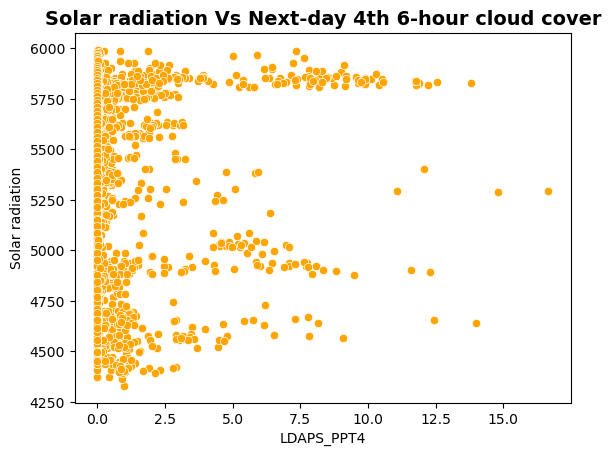

In [62]:
plt.title('Solar radiation Vs Next-day 4th 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_PPT4',y='Solar radiation',data=df,color="orange")

<Axes: title={'center': 'Solar radiation Vs lat'}, xlabel='lat', ylabel='Solar radiation'>

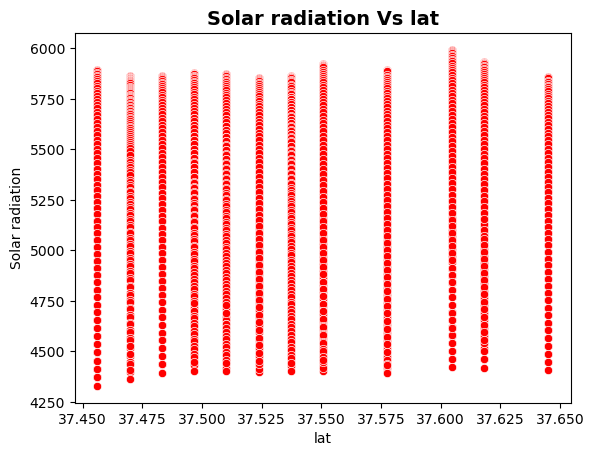

In [63]:
plt.title('Solar radiation Vs lat',fontsize=14, fontweight='bold')
sns.scatterplot(x='lat',y='Solar radiation',data=df,color="red")

<Axes: title={'center': 'Solar radiation Vs month'}, xlabel='Month', ylabel='Solar radiation'>

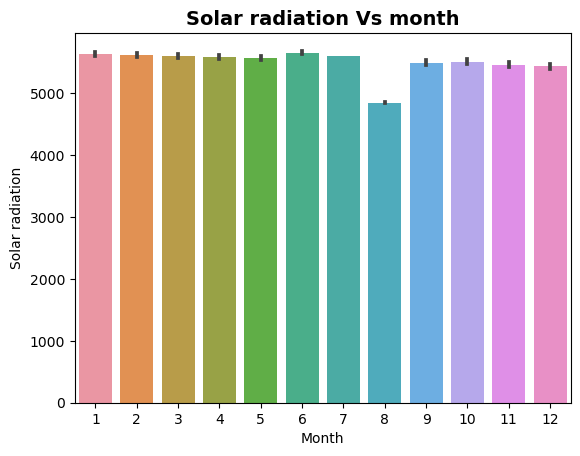

In [85]:
plt.title('Solar radiation Vs month',fontsize=14, fontweight='bold')
sns.barplot(x='Month',y='Solar radiation',data=df)

<Axes: title={'center': 'Solar radiation Vs lon'}, xlabel='lon', ylabel='Solar radiation'>

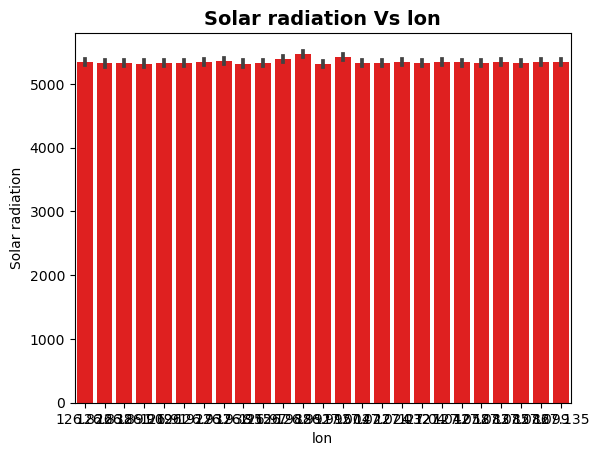

In [86]:
plt.title('Solar radiation Vs lon',fontsize=14, fontweight='bold')
sns.barplot(x='lon',y='Solar radiation',data=df,color="red")

<Axes: title={'center': 'present_Tmax Vs lon'}, xlabel='lon', ylabel='Present_Tmax'>

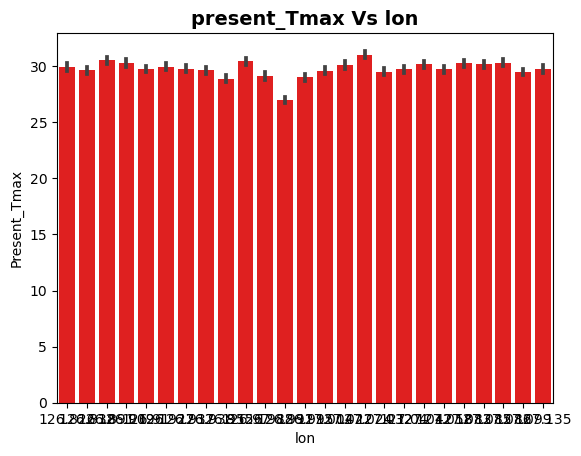

In [87]:
plt.title('present_Tmax Vs lon',fontsize=14, fontweight='bold')
sns.barplot(x='lon',y='Present_Tmax',data=df,color="red")

<Axes: title={'center': 'present_Tmin Vs lon'}, xlabel='lon', ylabel='Present_Tmin'>

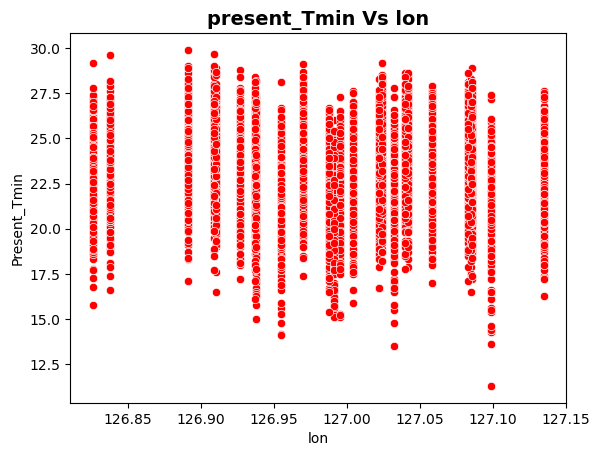

In [66]:
plt.title('present_Tmin Vs lon',fontsize=14, fontweight='bold')
sns.scatterplot(x='lon',y='Present_Tmin',data=df,color="red")

<Axes: title={'center': 'present_Tmin Vs lat'}, xlabel='lon', ylabel='Present_Tmin'>

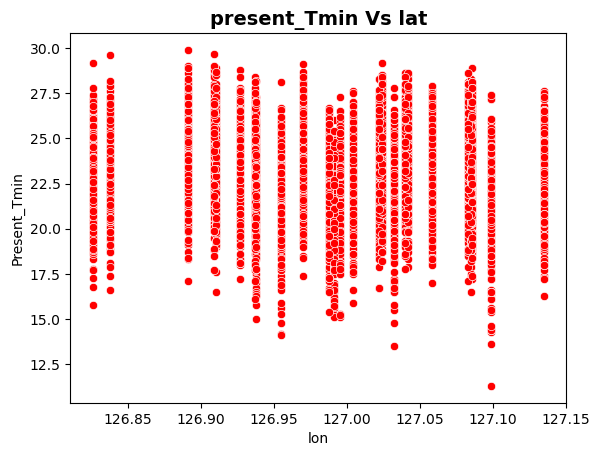

In [67]:
plt.title('present_Tmin Vs lat',fontsize=14, fontweight='bold')
sns.scatterplot(x='lon',y='Present_Tmin',data=df,color="red")

<Axes: title={'center': 'present_Tmin Vs Month'}, xlabel='Month', ylabel='Present_Tmin'>

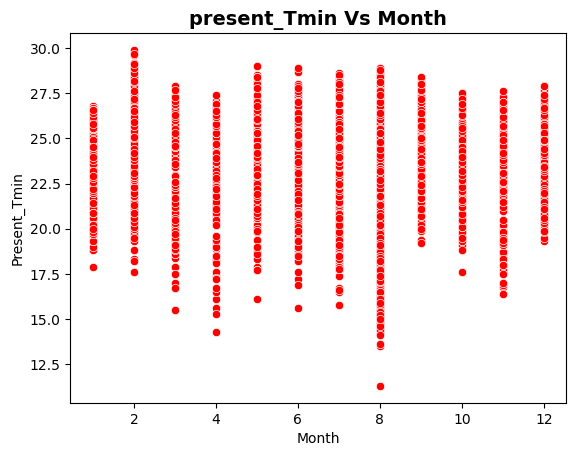

In [71]:
plt.title('present_Tmin Vs Month',fontsize=14, fontweight='bold')
sns.scatterplot(x='Month',y='Present_Tmin',data=df,color="red")

<Axes: title={'center': 'present_Tmax Vs month'}, xlabel='Month', ylabel='Present_Tmax'>

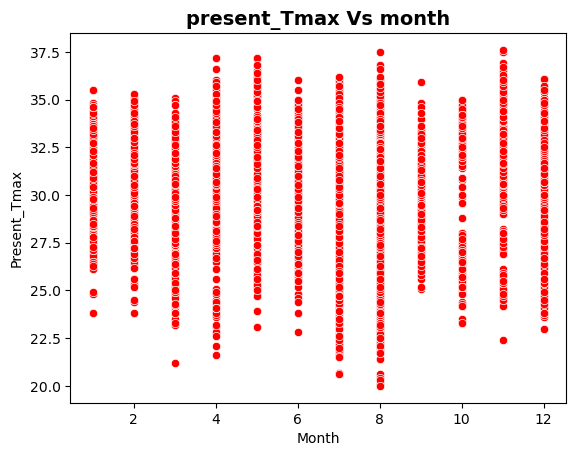

In [72]:
plt.title('present_Tmax Vs month',fontsize=14, fontweight='bold')
sns.scatterplot(x='Month',y='Present_Tmax',data=df,color="red")

<Axes: title={'center': 'Next_Tmax Vs month'}, xlabel='Month', ylabel='Next_Tmax'>

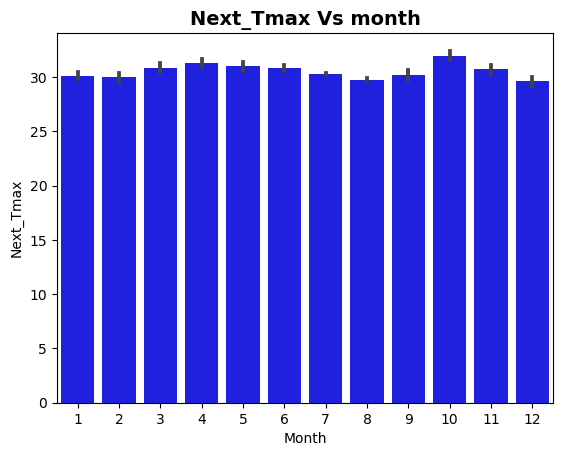

In [73]:
plt.title('Next_Tmax Vs month',fontsize=14, fontweight='bold')
sns.barplot(x='Month',y='Next_Tmax',data=df,color="blue")

<Axes: title={'center': 'Next_Tmin Vs month'}, xlabel='Month', ylabel='Next_Tmin'>

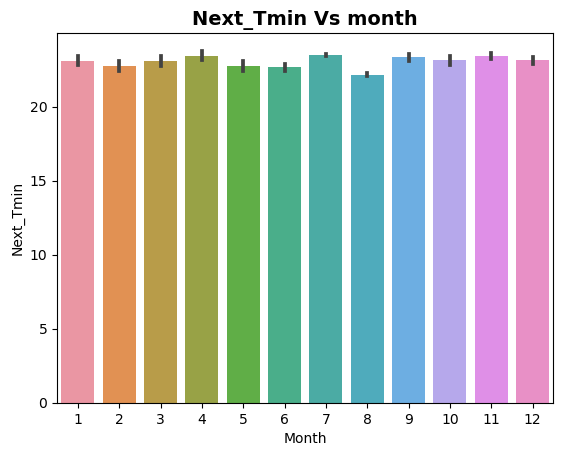

In [74]:
plt.title('Next_Tmin Vs month',fontsize=14, fontweight='bold')
sns.barplot(x='Month',y='Next_Tmin',data=df)

<Axes: title={'center': 'Next-day 1st 6-hour Precipitation Vs month'}, xlabel='Month', ylabel='LDAPS_PPT1'>

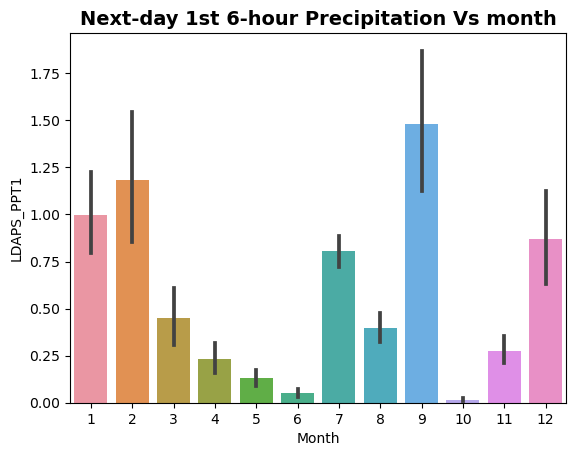

In [82]:
plt.title('Next-day 1st 6-hour Precipitation Vs month',fontsize=14, fontweight='bold')
sns.barplot(x=df['Month'], y=df['LDAPS_PPT1'],data=df)

9 th month show highest

<Axes: title={'center': 'Next-day 2nd 6-hour Precipitation Vs month'}, xlabel='Month', ylabel='LDAPS_PPT2'>

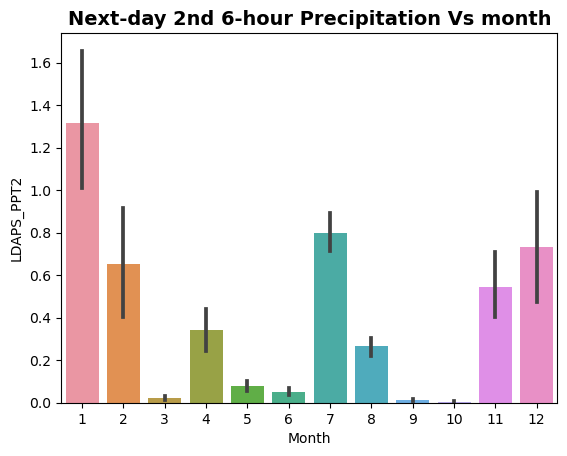

In [83]:
plt.title('Next-day 2nd 6-hour Precipitation Vs month',fontsize=14, fontweight='bold')
sns.barplot(x=df['Month'], y=df['LDAPS_PPT2'],data=df)

1st month shows highest

<Axes: title={'center': 'Next-day 3rd 6-hour Precipitation Vs month'}, xlabel='Month', ylabel='LDAPS_PPT3'>

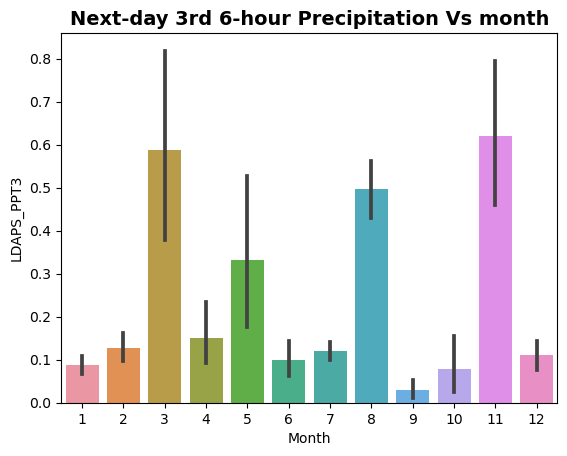

In [77]:
plt.title('Next-day 3rd 6-hour Precipitation Vs month',fontsize=14, fontweight='bold')
sns.barplot(x=df['Month'], y=df['LDAPS_PPT3'],data=df)

3rd month shows highest value

<Axes: title={'center': 'Next-day 4th 6-hour Precipitation Vs month'}, xlabel='Month', ylabel='LDAPS_PPT4'>

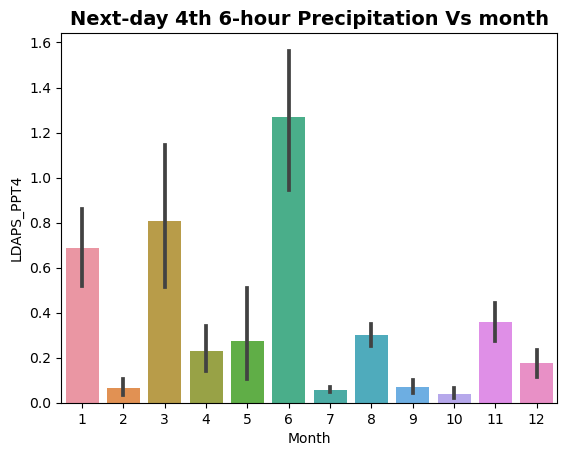

In [78]:
plt.title('Next-day 4th 6-hour Precipitation Vs month',fontsize=14, fontweight='bold')
sns.barplot(x=df['Month'], y=df['LDAPS_PPT4'],data=df)

6th month show highest value

Minimum Wind Speed : 2.882579625 m/s
Maximum Wind Speed : 21.85762099 m/s
Average Wind Speed : 7.0940966991598575 m/s


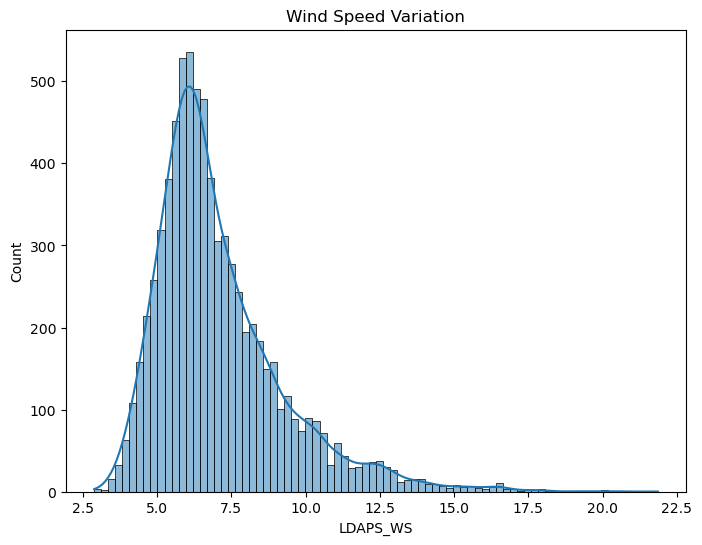

In [88]:
plt.figure(figsize=(8,6))
sns.histplot(df['LDAPS_WS'],kde=True)
plt.title('Wind Speed Variation')
print('Minimum Wind Speed :',df['LDAPS_WS'].min(),'m/s')
print('Maximum Wind Speed :',df['LDAPS_WS'].max(),'m/s')
print('Average Wind Speed :',df['LDAPS_WS'].mean(),'m/s')

Minimum Solar radiation : 4329.520508
Maximum Solar radiation : 5992.895996
Average Solar radiation : 5343.724207856747


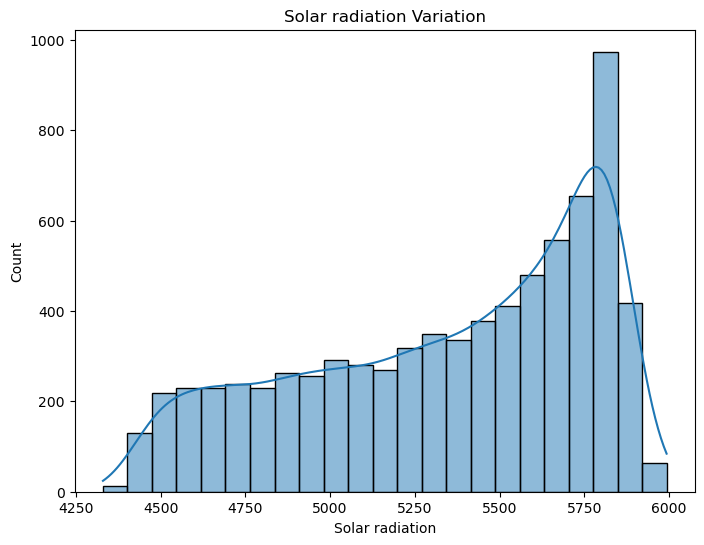

In [89]:
plt.figure(figsize=(8,6))
sns.histplot(df['Solar radiation'],kde=True)
plt.title('Solar radiation Variation')
print('Minimum Solar radiation :',df['Solar radiation'].min())
print('Maximum Solar radiation :',df['Solar radiation'].max())
print('Average Solar radiation :',df['Solar radiation'].mean())

Minimum LDAPS_RHmax : 58.93628311
Maximum LDAPS_RHmax : 100.0001526
Average LDAPS_RHmax : 88.3608233703677


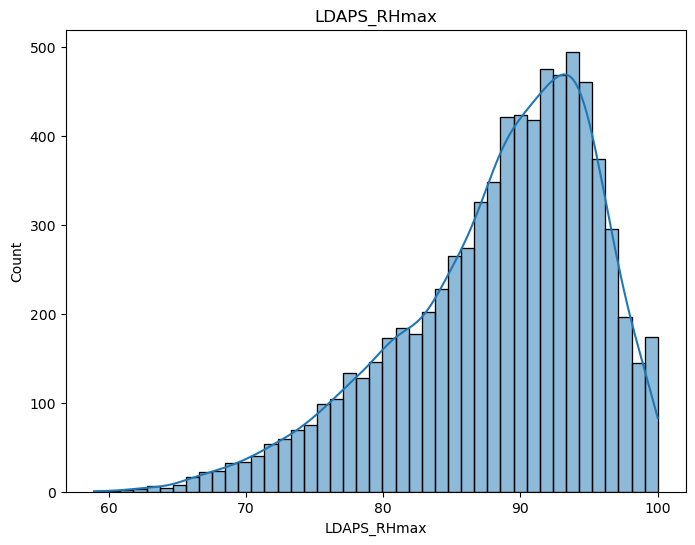

In [90]:
plt.figure(figsize=(8,6))
sns.histplot(df['LDAPS_RHmax'],kde=True)
plt.title('LDAPS_RHmax')
print('Minimum LDAPS_RHmax :',df['LDAPS_RHmax'].min())
print('Maximum LDAPS_RHmax :',df['LDAPS_RHmax'].max())
print('Average LDAPS_RHmax :',df['LDAPS_RHmax'].mean())

Minimum LDAPS_Tmax_lapse : 17.62495378
Maximum LDAPS_Tmax_lapse : 38.54225522
Average LDAPS_Tmax_lapse : 29.62012769006853


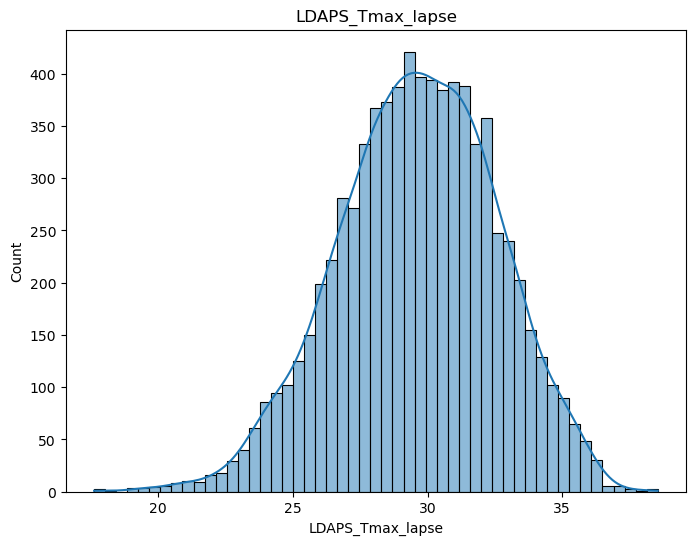

In [92]:

plt.figure(figsize=(8,6))
sns.histplot(df['LDAPS_Tmax_lapse'],kde=True)
plt.title('LDAPS_Tmax_lapse')
print('Minimum LDAPS_Tmax_lapse :',df['LDAPS_Tmax_lapse'].min())
print('Maximum LDAPS_Tmax_lapse :',df['LDAPS_Tmax_lapse'].max())
print('Average LDAPS_Tmax_lapse :',df['LDAPS_Tmax_lapse'].mean())

Minimum Latent Heat Flux : -13.60321209
Maximum Latent Heat Flux : 213.4140062
Average Latent Heat Flux : 62.492606287988


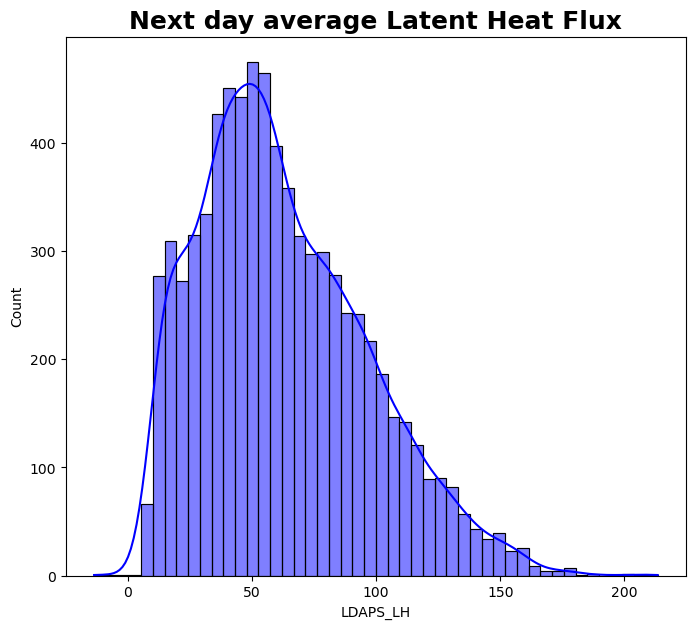

In [93]:
plt.figure(figsize=(8,7))
sns.histplot(df['LDAPS_LH'],kde=True,color='blue')
plt.title('Next day average Latent Heat Flux',fontsize=18, fontweight='bold')
print('Minimum Latent Heat Flux :',df['LDAPS_LH'].min())
print('Maximum Latent Heat Flux :',df['LDAPS_LH'].max())
print('Average Latent Heat Flux :',df['LDAPS_LH'].mean())

In [99]:
df.columns.to_series().groupby(df.dtypes).groups

{float64: ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'], datetime64[ns]: ['Date'], int64: ['Month', 'Day', 'Year']}

In [100]:
df.drop(['Date'], axis=1, inplace=True)

In [102]:
df.dtypes

station             float64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
Month                 int64
Day                   int64
Year                  int64
dtype: object

In [103]:
df.head(3)

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS   LDAPS_LH  LDAPS_CC1  ...  \
0         28.074101         23.006936  6.818887  69.451805   0.233947  ...   
1         29.850689         24.035009  5.691890  51.937448   0.225508  ...   
2         30.091292         24.565633  6.138224  20.573050   0.209344  ...   

       lat      lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  \
0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1       21.2   
1  37.6046  127.032   44.7624  0.5141      5869.312500       30.5       22.5   
2  37.5776  127.058   33.3068  0.2661      5863.555664       31.1       23.9   

   Month  Day  Year  
0      6   30  2013  
1      6   30  2013  
2      6   30  2013  

[3 rows x 27 columns]

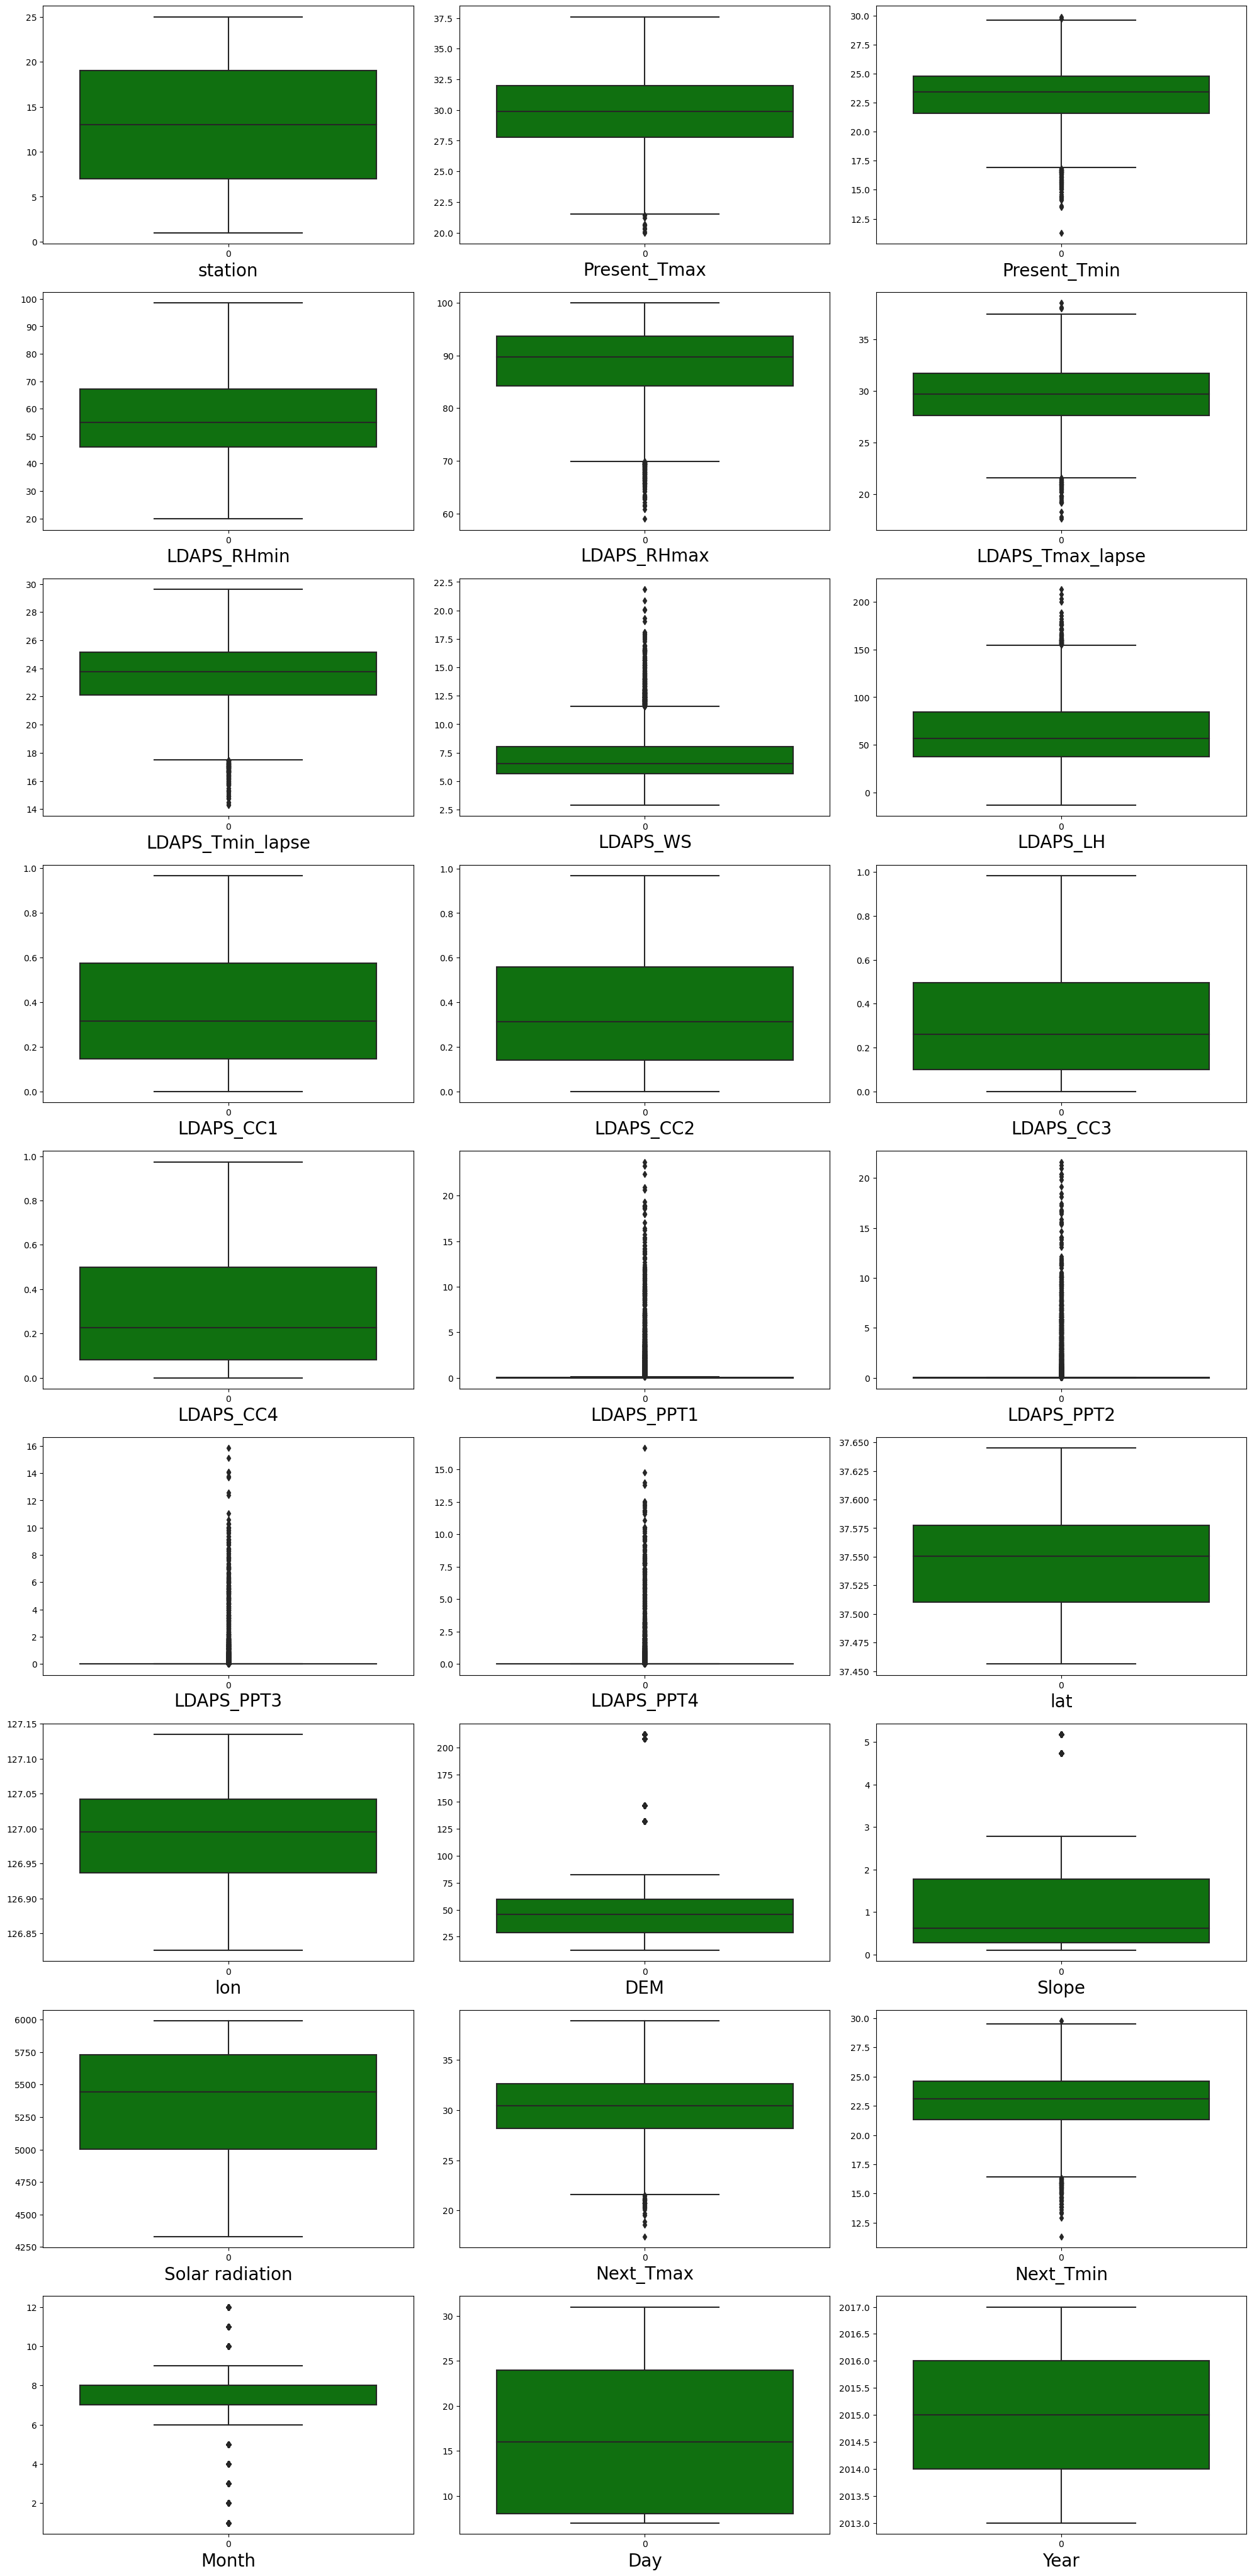

In [106]:
plt.figure(figsize=(20,45),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=27:
        ax=plt.subplot(10,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()


In [107]:
df.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
Month              -0.703092
Day                 0.245563
Year                0.013575
dtype: float64

range between +_ 0.5

In [108]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

In [109]:
print('old dataframe',df.shape[0])
print('New dataframe',df1.shape[0])

old dataframe 7588
New dataframe 6739


In [110]:
print('Data loss percentage-',((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data loss percentage- 11.188719030047443


In [112]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
df2=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

In [113]:
print('old dataframe',df.shape[0])
print('New dataframe',df2.shape[0])

old dataframe 7588
New dataframe 2371


In [114]:
print('Data loss percentage after removing outliers with IQR method-',((df.shape[0]-df2.shape[0])/df.shape[0])*100)

Data loss percentage after removing outliers with IQR method- 68.7532946758039


In [115]:
df=df1

In [116]:
df.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Month              -0.680725
Day                 0.256528
Year                0.025066
dtype: float64

In [119]:
skew=['LDAPS_RHmax','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC3','LDAPS_CC4',
      'LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Solar radiation','Month']

# Importing Powertransformer
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
df[skew] = scaler.fit_transform(df[skew].values)

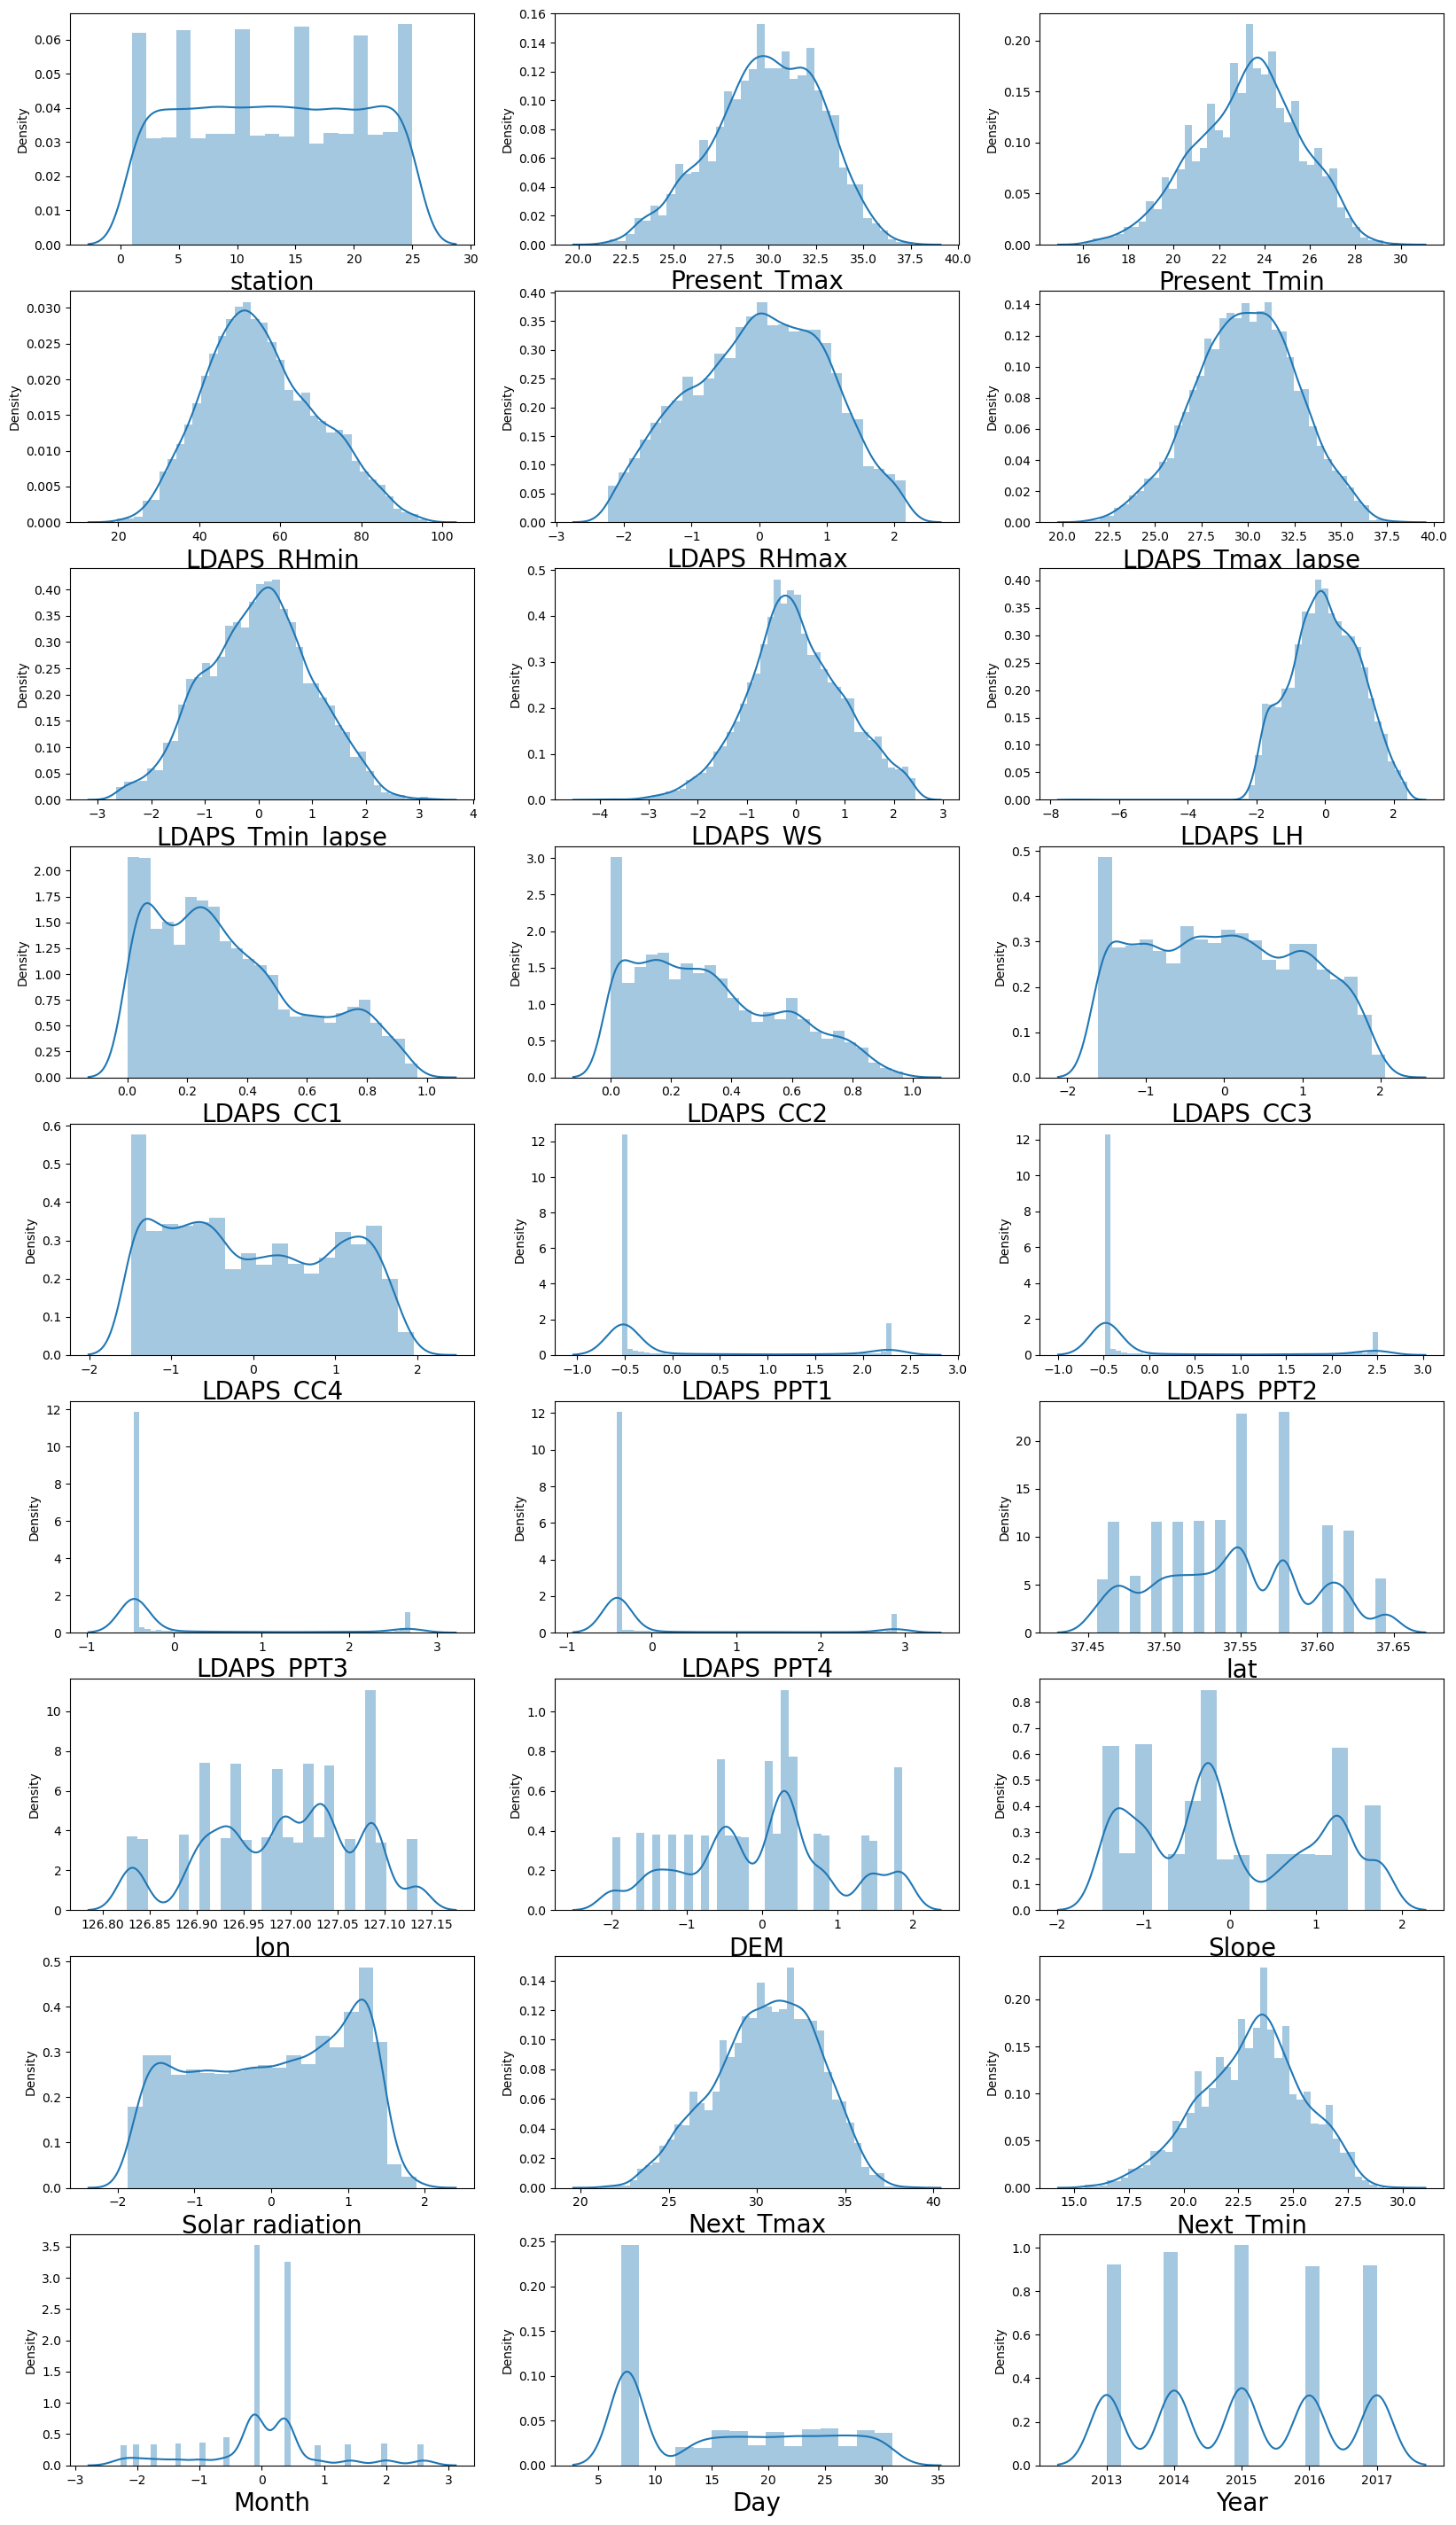

In [120]:
plt.figure(figsize=(20,40),facecolor='white')
plotnum=1
for col in df:
    if plotnum<=29:
        plt.subplot(10,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [121]:
df.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.103320
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.027814
LDAPS_WS            0.007615
LDAPS_LH           -0.030736
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.094449
LDAPS_CC4           0.142061
LDAPS_PPT1          1.617538
LDAPS_PPT2          1.820237
LDAPS_PPT3          1.995359
LDAPS_PPT4          2.267954
lat                 0.106983
lon                -0.277547
DEM                 0.038830
Slope               0.233799
Solar radiation    -0.172156
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Month               0.039744
Day                 0.256528
Year                0.025066
dtype: float64

outliers removed

In [123]:
df['LDAPS_PPT1']=np.cbrt(df['LDAPS_PPT1'])
df['LDAPS_PPT2']=np.cbrt(df['LDAPS_PPT2'])
df['LDAPS_PPT3']=np.cbrt(df['LDAPS_PPT3'])
df['LDAPS_PPT4']=np.cbrt(df['LDAPS_PPT4'])

In [124]:
df.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.103320
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.027814
LDAPS_WS            0.007615
LDAPS_LH           -0.030736
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.094449
LDAPS_CC4           0.142061
LDAPS_PPT1          1.366309
LDAPS_PPT2          1.537985
LDAPS_PPT3          1.629988
LDAPS_PPT4          1.891984
lat                 0.106983
lon                -0.277547
DEM                 0.038830
Slope               0.233799
Solar radiation    -0.172156
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Month               0.039744
Day                 0.256528
Year                0.025066
dtype: float64

# Machine Learning Model Building For Next_Tmax

In [125]:
# Splitting data in target and dependent feature
X = df.drop(['Next_Tmax'], axis =1)
Y = df['Next_Tmax']

In [126]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix,mean_absolute_error
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

In [128]:
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    pred=lr.predict(X_test)
    acc=r2_score(y_test,pred) 
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best r2_score is-",maxAccu,"at randomstate is -",maxRS)

Best r2_score is- 0.8107388160216301 at randomstate is - 84


In [129]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=maxRS)

In [130]:
print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (4717, 26)
Size of y_train :  (4717,)
Size of X_test :  (2022, 26)
Size of Y_test :  (2022,)


In [131]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [132]:
pred_LR=LR.predict(X_test)
pred_train=LR.predict(X_train)
print('R2_score',r2_score(y_test,pred_LR))
print('R2_score on training data',r2_score(y_train,pred_train)*100)
print('Mean absolute Error',mean_absolute_error(y_test,pred_LR))
print('Mean Squared Error',mean_squared_error(y_test,pred_LR))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_LR)))

R2_score 0.7985700571244208
R2_score on training data 77.87344058200217
Mean absolute Error 1.0262573603765959
Mean Squared Error 1.7818734269536636
Root Mean Squared Error 1.3348683182073293


In [133]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()
RFR.fit(X_train, y_train)
pred_RFR=RFR.predict(X_test)
pred_train=RFR.predict(X_train)
print('R2_score',r2_score(y_test,pred_RFR))
print('R2_score on training data',r2_score(y_train,pred_train)*100)
print('Mean absolute Error',mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error',mean_squared_error(y_test,pred_RFR))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_score 0.908997333997116
R2_score on training data 98.45659554418715
Mean absolute Error 0.6771745796241345
Mean Squared Error 0.805020495054401
Root Mean Squared Error 0.8972293436209056


In [134]:
from sklearn.neighbors import KNeighborsRegressor as KNN
knn=KNN()
knn.fit(X_train, y_train)
pred_knn=knn.predict(X_test)
pred_train=knn.predict(X_train)
print('R2_score',r2_score(y_test,pred_knn))
print('R2_score on training data',r2_score(y_train,pred_train)*100)
print('Mean absolute Error',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error',mean_squared_error(y_test,pred_knn))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_score 0.7878186569115289
R2_score on training data 85.95153432592151
Mean absolute Error 1.0473194856577646
Mean Squared Error 1.8769816023738874
Root Mean Squared Error 1.3700297815645788


In [135]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import GradientBoostingRegressor
GBR=GradientBoostingRegressor()
GBR.fit(X_train, y_train)
pred_GBR=GBR.predict(X_test)
pred_train=GBR.predict(X_train)
print('R2_score',r2_score(y_test,pred_GBR))
print('R2_score on training data',r2_score(y_train,pred_train)*100)
print('Mean absolute Error',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error',mean_squared_error(y_test,pred_GBR))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_score 0.8674432317118751
R2_score on training data 87.95494772368819
Mean absolute Error 0.83201026756302
Mean Squared Error 1.1726130663769352
Root Mean Squared Error 1.0828725993287185


In [136]:
lasso=Lasso()
lasso.fit(X_train, y_train)
pred_lasso=lasso.predict(X_test)
pred_train=lasso.predict(X_train)
print('R2_score',r2_score(y_test,pred_lasso))
print('R2_score on training data',r2_score(y_train,pred_train)*100)
print('Mean absolute Error',mean_absolute_error(y_test,pred_lasso))
print('Mean Squared Error',mean_squared_error(y_test,pred_lasso))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2_score 0.6985323178195688
R2_score on training data 67.89673209710956
Mean absolute Error 1.2874380307519673
Mean Squared Error 2.6668192637796193
Root Mean Squared Error 1.6330398843199205


In [137]:
rd=Ridge()
rd.fit(X_train, y_train)
pred_rd=rd.predict(X_test)
pred_train=rd.predict(X_train)
print('R2_score',r2_score(y_test,pred_rd))
print('R2_score on training data',r2_score(y_train,pred_train)*100)
print('Mean absolute Error',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error',mean_squared_error(y_test,pred_rd))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_rd)))

R2_score 0.7985806568579239
R2_score on training data 77.8730907735709
Mean absolute Error 1.0264249658352047
Mean Squared Error 1.781779660440144
Root Mean Squared Error 1.33483319573651


In [138]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train, y_train)
pred_dtr=dtr.predict(X_test)
pred_train=dtr.predict(X_train)
print('R2_score',r2_score(y_test,pred_dtr))
print('R2_score on training data',r2_score(y_train,pred_train)*100)
print('Mean absolute Error',mean_absolute_error(y_test,pred_dtr))
print('Mean Squared Error',mean_squared_error(y_test,pred_dtr))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2_score 0.7842102415697191
R2_score on training data 100.0
Mean absolute Error 1.0031651829871413
Mean Squared Error 1.9089020771513352
Root Mean Squared Error 1.3816302244635992


In [139]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train, y_train)
pred_svr=svr.predict(X_test)
pred_train=svr.predict(X_train)
print('R2_score',r2_score(y_test,pred_svr))
print('R2_score on training data',r2_score(y_train,pred_train)*100)
print('Mean absolute Error',mean_absolute_error(y_test,pred_svr))
print('Mean Squared Error',mean_squared_error(y_test,pred_svr))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_svr)))

R2_score 0.052294051861828894
R2_score on training data 5.495228621357128
Mean absolute Error 2.346467371246748
Mean Squared Error 8.38352045106034
Root Mean Squared Error 2.8954309611973725


In [140]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(X_train, y_train)
pred_etr=etr.predict(X_test)
pred_train=etr.predict(X_train)
print('R2_score',r2_score(y_test,pred_etr))
print('R2_score on training data',r2_score(y_train,pred_train)*100)
print('Mean absolute Error',mean_absolute_error(y_test,pred_etr))
print('Mean Squared Error',mean_squared_error(y_test,pred_etr))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_etr)))

R2_score 0.9305134097923247
R2_score on training data 100.0
Mean absolute Error 0.5918036597428291
Mean Squared Error 0.6146867087042528
Root Mean Squared Error 0.7840195843882044


In [141]:
score=cross_val_score(LR,X,Y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Differences between R2score and cv score',(r2_score(y_test,pred_LR)-score.mean())*100)

[0.73687639 0.66648906 0.70016898 0.75630264 0.55293621]
0.6825546555354691
Differences between R2score and cv score 11.601540158895162


In [142]:
score=cross_val_score(RFR,X,Y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Differences between R2score and cv score',(r2_score(y_test,pred_RFR)-score.mean())*100)

[0.73478899 0.66758101 0.67311673 0.73130256 0.62206047]
0.6857699516469751
Differences between R2score and cv score 22.322738235014093


In [143]:
score=cross_val_score(knn,X,Y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Differences between R2score and cv score',(r2_score(y_test,pred_knn)-score.mean())*100)

[0.54314158 0.42267404 0.502106   0.73689047 0.48469069]
0.5379005568699661
Differences between R2score and cv score 24.991810004156278


In [144]:
score=cross_val_score(lasso,X,Y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Differences between R2score and cv score',(r2_score(y_test,pred_lasso)-score.mean())*100)

[0.62711702 0.59468698 0.64534447 0.68447107 0.62563065]
0.6354500381686639
Differences between R2score and cv score 6.308227965090496


In [146]:
score=cross_val_score(rd,X,Y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Differences between R2score and cv score',(r2_score(y_test,pred_rd)-score.mean())*100)

[0.73684802 0.66669967 0.70027618 0.75640531 0.55287057]
0.682619952530969
Differences between R2score and cv score 11.596070432695493


In [147]:
score=cross_val_score(dtr,X,Y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Differences between R2score and cv score',(r2_score(y_test,pred_dtr)-score.mean())*100)

[0.39695438 0.46758891 0.378568   0.49580129 0.3548631 ]
0.4187551355954991
Differences between R2score and cv score 36.545510597422


In [148]:
score=cross_val_score(svr,X,Y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Differences between R2score and cv score',(r2_score(y_test,pred_svr)-score.mean())*100)

[ 0.07228255 -0.17428963  0.05057449 -0.14015148  0.02966883]
-0.03238304951863909
Differences between R2score and cv score 8.467710138046797


In [149]:
score=cross_val_score(svr,X,Y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Differences between R2score and cv score',(r2_score(y_test,pred_svr)-score.mean())*100)

[ 0.07228255 -0.17428963  0.05057449 -0.14015148  0.02966883]
-0.03238304951863909
Differences between R2score and cv score 8.467710138046797


rom the difference of both R2score and CV score computed on R2score . We can conclude that lasso as our best fitting and best performing model

In [154]:
param={'alpha':[0], 
       'fit_intercept':[True], 
       'precompute':[False], 
       'copy_X':[True], 
       'max_iter':[1000], 
       'tol':[0.0001], 
       'warm_start':[False], 
       'positive':[False], 
       'random_state':[None], 
       'selection':['cyclic']}

In [155]:
gscv=GridSearchCV(lasso,param,cv=5)
gscv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0], 'copy_X': [True],
                         'fit_intercept': [True], 'max_iter': [1000],
                         'positive': [False], 'precompute': [False],
                         'random_state': [None], 'selection': ['cyclic'],
                         'tol': [0.0001], 'warm_start': [False]})

In [156]:
gscv.best_params_

{'alpha': 0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [159]:
Model=Lasso(alpha=0,
 copy_X=True,
 fit_intercept=True,
 max_iter=1000,
 positive=False,
 precompute=False,
 random_state=None,
 selection='cyclic',
 tol=0.0001,
 warm_start=False)

In [160]:
Model.fit(X_train, y_train)
pred=Model.predict(X_test)
print('R2_score',r2_score(y_test,pred))
print('Mean absolute Error',mean_absolute_error(y_test,pred))
print('Mean Squared Error',mean_squared_error(y_test,pred))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred)))

R2_score 0.7985700571244205
Mean absolute Error 1.0262573603765968
Mean Squared Error 1.781873426953667
Root Mean Squared Error 1.3348683182073304


# save model¶¶

In [161]:
import joblib
import pickle
filename='Next_Tmax Prediction.pkl'
pickle.dump(Model,open(filename,'wb'))

In [162]:
import pickle
loaded_model=pickle.load(open('Next_Tmax Prediction.pkl','rb'))
result=loaded_model.score(X_test,y_test)
print(result*100)

79.85700571244206


In [163]:
conclusion=pd.DataFrame([loaded_model.predict(X_test)[:],(y_test)[:]],index=['predicted','original'])
conclusion

0          1          2          3          4          5     \
predicted  32.557099  31.880722  33.267047  30.108724  28.707731  32.294097   
original   31.400000  31.600000  32.900000  29.200000  29.600000  33.000000   

                6          7          8          9     ...       2012  \
predicted  30.098698  29.641364  28.484492  32.073339  ...  33.602361   
original   29.400000  31.700000  28.800000  31.100000  ...  32.000000   

                2013       2014       2015       2016       2017       2018  \
predicted  27.902288  27.687857  26.617802  27.764955  30.090915  31.796652   
original   25.400000  28.700000  26.600000  26.800000  29.900000  31.100000   

                2019       2020       2021  
predicted  30.128891  29.116841  30.932155  
original   31.400000  28.200000  31.400000  

[2 rows x 2022 columns]

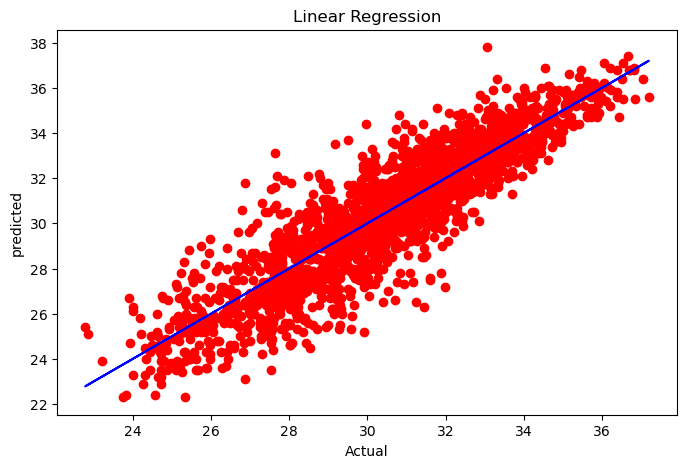

In [164]:
plt.figure(figsize=(8,5))
plt.scatter(x=pred_LR,y=y_test,color='r')
plt.plot(pred_LR,pred_LR,color='b')
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title('Linear Regression')
plt.show()

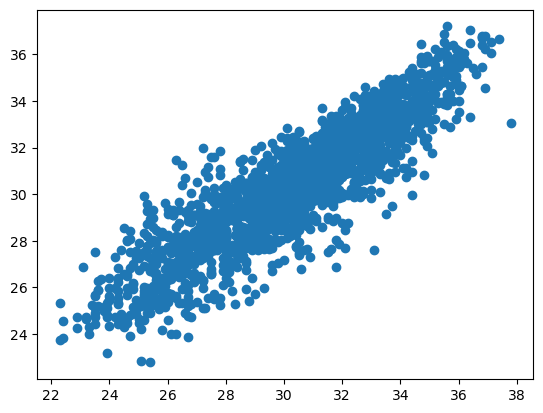

In [165]:
plt.scatter(x=y_test,y=pred)

Y Test       Pred
941     31.4  32.557099
6480    31.6  31.880722
6544    32.9  33.267047
5320    29.2  30.108724
5003    29.6  28.707731

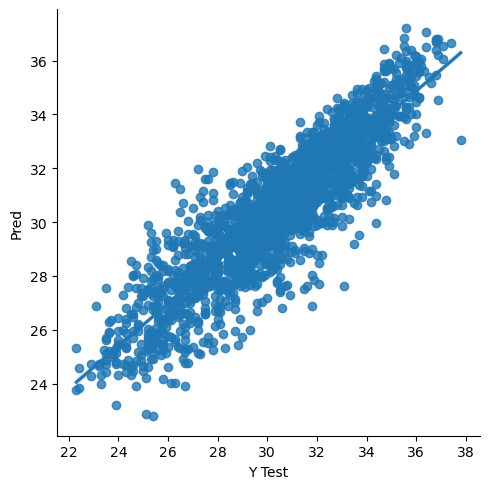

In [166]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

# Machine Learning Model Building For Next_Tmin

In [167]:
X = df.drop(['Next_Tmin'], axis =1)
Y = df['Next_Tmin']

In [168]:
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    pred=lr.predict(X_test)
    acc=r2_score(y_test,pred) 
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best r2_score is-",maxAccu,"at randomstate is -",maxRS)

Best r2_score is- 0.8537832438744972 at randomstate is - 176


In [169]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=maxRS)

In [170]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [171]:
pred_LR=LR.predict(X_test)
pred_train=LR.predict(X_train)
print('R2_score',r2_score(y_test,pred_LR))
print('R2_score on training data',r2_score(y_train,pred_train)*100)
print('Mean absolute Error',mean_absolute_error(y_test,pred_LR))
print('Mean Squared Error',mean_squared_error(y_test,pred_LR))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_LR)))

R2_score 0.8503207723393933
R2_score on training data 83.38815402106525
Mean absolute Error 0.7374836842912914
Mean Squared Error 0.8698301642664105
Root Mean Squared Error 0.9326468593558928


In [172]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()
RFR.fit(X_train, y_train)
pred_RFR=RFR.predict(X_test)
pred_train=RFR.predict(X_train)
print('R2_score',r2_score(y_test,pred_RFR))
print('R2_score on training data',r2_score(y_train,pred_train)*100)
print('Mean absolute Error',mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error',mean_squared_error(y_test,pred_RFR))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_score 0.9104889319331343
R2_score on training data 98.57961382604654
Mean absolute Error 0.54808803165183
Mean Squared Error 0.5201752324431257
Root Mean Squared Error 0.7212317466966673


In [173]:
from sklearn.neighbors import KNeighborsRegressor as KNN
knn=KNN()
knn.fit(X_train, y_train)
pred_knn=knn.predict(X_test)
pred_train=knn.predict(X_train)
print('R2_score',r2_score(y_test,pred_knn))
print('R2_score on training data',r2_score(y_train,pred_train)*100)
print('Mean absolute Error',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error',mean_squared_error(y_test,pred_knn))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_score 0.8169711913389262
R2_score on training data 87.46633929857907
Mean absolute Error 0.8098318496538082
Mean Squared Error 1.0636344213649849
Root Mean Squared Error 1.0313265347914717


In [174]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import GradientBoostingRegressor
GBR=GradientBoostingRegressor()
GBR.fit(X_train, y_train)
pred_GBR=GBR.predict(X_test)
pred_train=GBR.predict(X_train)
print('R2_score',r2_score(y_test,pred_GBR))
print('R2_score on training data',r2_score(y_train,pred_train)*100)
print('Mean absolute Error',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error',mean_squared_error(y_test,pred_GBR))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_score 0.8996690953159565
R2_score on training data 90.90820417015387
Mean absolute Error 0.594847615077953
Mean Squared Error 0.5830524961032214
Root Mean Squared Error 0.7635787425689778


In [175]:
lasso=Lasso()
lasso.fit(X_train, y_train)
pred_lasso=lasso.predict(X_test)
pred_train=lasso.predict(X_train)
print('R2_score',r2_score(y_test,pred_lasso))
print('R2_score on training data',r2_score(y_train,pred_train)*100)
print('Mean absolute Error',mean_absolute_error(y_test,pred_lasso))
print('Mean Squared Error',mean_squared_error(y_test,pred_lasso))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2_score 0.7215795541401224
R2_score on training data 70.1404802879878
Mean absolute Error 1.0205589450838521
Mean Squared Error 1.6179833764679572
Root Mean Squared Error 1.271999754900903


In [176]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train, y_train)
pred_dtr=dtr.predict(X_test)
pred_train=dtr.predict(X_train)
print('R2_score',r2_score(y_test,pred_dtr))
print('R2_score on training data',r2_score(y_train,pred_train)*100)
print('Mean absolute Error',mean_absolute_error(y_test,pred_dtr))
print('Mean Squared Error',mean_squared_error(y_test,pred_dtr))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2_score 0.7914358724310006
R2_score on training data 100.0
Mean absolute Error 0.8339268051434222
Mean Squared Error 1.212027695351137
Root Mean Squared Error 1.100921293894862


In [177]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train, y_train)
pred_svr=svr.predict(X_test)
pred_train=svr.predict(X_train)
print('R2_score',r2_score(y_test,pred_svr))
print('R2_score on training data',r2_score(y_train,pred_train)*100)
print('Mean absolute Error',mean_absolute_error(y_test,pred_svr))
print('Mean Squared Error',mean_squared_error(y_test,pred_svr))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_svr)))

R2_score 0.018001733581578416
R2_score on training data 2.093604468518828
Mean absolute Error 1.8970638847311971
Mean Squared Error 5.706681726905187
Root Mean Squared Error 2.3888662011308184


In [178]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(X_train, y_train)
pred_etr=etr.predict(X_test)
pred_train=etr.predict(X_train)
print('R2_score',r2_score(y_test,pred_etr))
print('R2_score on training data',r2_score(y_train,pred_train)*100)
print('Mean absolute Error',mean_absolute_error(y_test,pred_etr))
print('Mean Squared Error',mean_squared_error(y_test,pred_etr))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_etr)))

R2_score 0.9215951700166521
R2_score on training data 100.0
Mean absolute Error 0.5093541048466865
Mean Squared Error 0.4556336053412464
Root Mean Squared Error 0.6750063742967517


In [179]:
score=cross_val_score(LR,X,Y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Differences between R2score and cv score',(r2_score(y_test,pred_LR)-score.mean())*100)

[0.74871488 0.66795427 0.79768992 0.86771402 0.86553214]
0.789521048235895
Differences between R2score and cv score 6.079972410349832


In [180]:
score=cross_val_score(RFR,X,Y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Differences between R2score and cv score',(r2_score(y_test,pred_RFR)-score.mean())*100)

[0.71710172 0.70023345 0.80921808 0.87532938 0.85338515]
0.7910535558428964
Differences between R2score and cv score 11.94353760902379


In [181]:
score=cross_val_score(knn,X,Y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Differences between R2score and cv score',(r2_score(y_test,pred_knn)-score.mean())*100)

[0.41561787 0.42974821 0.52941836 0.76174787 0.75613717]
0.5785338962932801
Differences between R2score and cv score 23.843729504564603


In [182]:
score=cross_val_score(lasso,X,Y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Differences between R2score and cv score',(r2_score(y_test,pred_lasso)-score.mean())*100)

[0.53862215 0.52914096 0.66159213 0.73992848 0.77718984]
0.6492947125238558
Differences between R2score and cv score 7.228484161626659


In [183]:
score=cross_val_score(rd,X,Y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Differences between R2score and cv score',(r2_score(y_test,pred_rd)-score.mean())*100)

[0.74861664 0.66803813 0.79766186 0.86771903 0.86578524]
0.7895641817554424
Differences between R2score and cv score -1161.7426268139568


In [184]:
score=cross_val_score(dtr,X,Y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Differences between R2score and cv score',(r2_score(y_test,pred_dtr)-score.mean())*100)

[0.46320757 0.4667549  0.62840458 0.7607365  0.67848259]
0.5995172275967894
Differences between R2score and cv score 19.191864483421117


In [185]:
score=cross_val_score(svr,X,Y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Differences between R2score and cv score',(r2_score(y_test,pred_svr)-score.mean())*100)

[-0.07141189 -0.49837028 -0.06347205 -0.01772277  0.02773103]
-0.12464919150932433
Differences between R2score and cv score 14.265092509090275


In [186]:
score=cross_val_score(svr,X,Y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Differences between R2score and cv score',(r2_score(y_test,pred_svr)-score.mean())*100)

[-0.07141189 -0.49837028 -0.06347205 -0.01772277  0.02773103]
-0.12464919150932433
Differences between R2score and cv score 14.265092509090275


from the difference of both R2score and CV score computed on R2score . We can conclude that LinearRegression as our best fitting and best performing model

In [191]:
param={'fit_intercept':[True], 
       'copy_X':[True], 
       'n_jobs':[None], 
       'positive':[False]}

In [192]:
gscv=GridSearchCV(LR,param,cv=5)
gscv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True], 'fit_intercept': [True],
                         'n_jobs': [None], 'positive': [False]})

In [193]:
gscv.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [195]:
Model=LinearRegression(copy_X =True, 
       fit_intercept=True, 
       n_jobs=None, 
       positive=False)

In [196]:
Model.fit(X_train, y_train)
pred=Model.predict(X_test)
print('R2_score',r2_score(y_test,pred))
print('Mean absolute Error',mean_absolute_error(y_test,pred))
print('Mean Squared Error',mean_squared_error(y_test,pred))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred)))

R2_score 0.8503207723393933
Mean absolute Error 0.7374836842912914
Mean Squared Error 0.8698301642664105
Root Mean Squared Error 0.9326468593558928


# save model¶¶

In [197]:
import joblib
import pickle
filename='Next_Tmin Prediction.pkl'
pickle.dump(Model,open(filename,'wb'))

In [198]:
import pickle
loaded_model=pickle.load(open('Next_Tmin Prediction.pkl','rb'))
result=loaded_model.score(X_test,y_test)
print(result*100)

85.03207723393933


In [199]:
conclusion=pd.DataFrame([loaded_model.predict(X_test)[:],(y_test)[:]],index=['predicted','original'])
conclusion

0          1          2          3          4          5     \
predicted  27.525217  21.854207  25.239651  25.475537  18.374485  22.731213   
original   26.300000  23.000000  25.400000  24.600000  15.500000  23.500000   

                6          7         8          9     ...      2012      2013  \
predicted  26.385066  23.561114  19.71258  20.949504  ...  20.68402  20.24714   
original   26.400000  25.300000  20.80000  21.000000  ...  20.40000  19.60000   

                2014      2015       2016       2017       2018       2019  \
predicted  26.005653  24.07668  26.596285  23.629608  22.766837  23.073562   
original   27.000000  23.30000  27.300000  23.200000  21.700000  22.800000   

                2020       2021  
predicted  23.083487  16.887324  
original   22.500000  16.000000  

[2 rows x 2022 columns]

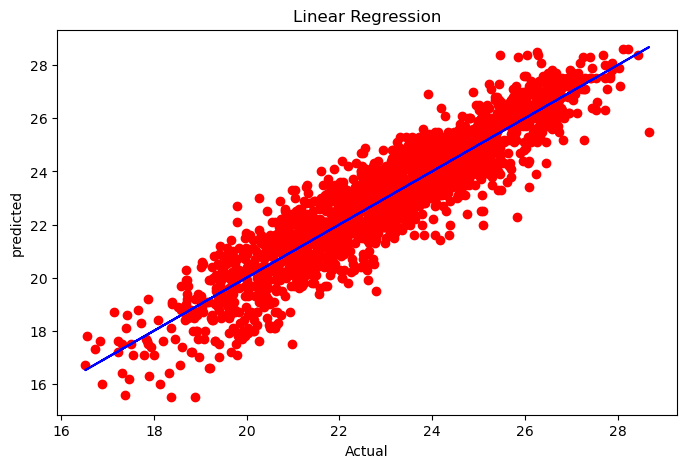

In [200]:
plt.figure(figsize=(8,5))
plt.scatter(x=pred_LR,y=y_test,color='r')
plt.plot(pred_LR,pred_LR,color='b')
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title('Linear Regression')
plt.show()

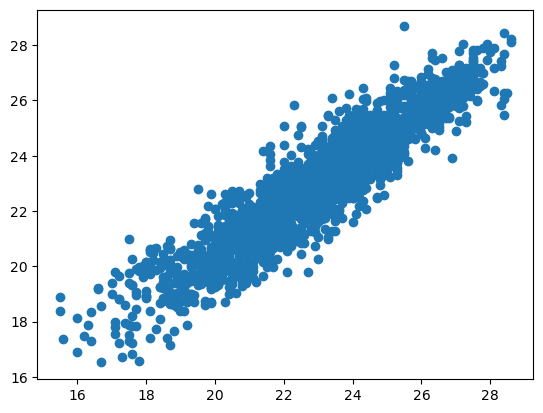

In [201]:
plt.scatter(x=y_test,y=pred)

Y Test       Pred
7110    26.3  27.525217
6291    23.0  21.854207
5658    25.4  25.239651
2310    24.6  25.475537
3241    15.5  18.374485

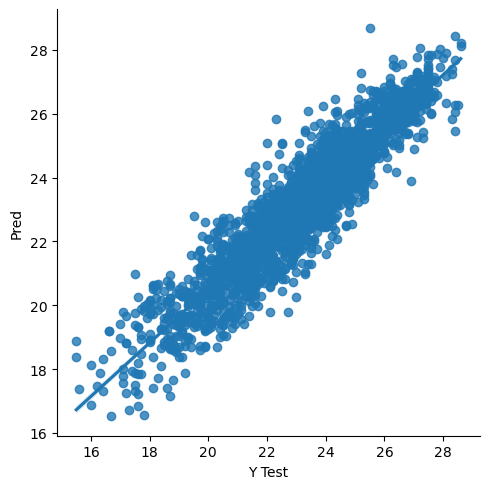

In [202]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()